* **🔗 Check out the [Streamlit app](https://used-car-price-prediction-with-machine-learning-and.streamlit.app/) for this project!**
* **💻 Explore the complete code on [GitHub](https://github.com/arunkumarsp-ds/Used-Car-Price-Prediction-with-Machine-Learning-and-Streamlit)!**

## **Introduction:**

In this project, I aim to build a **predictive model that estimates the selling price of used cars based on various features**. This analysis involves constructing a **machine learning model** and conducting a thorough **exploratory data analysis (EDA)** to uncover **insights and patterns** within the data.

## Goal:

The primary goal is to **assist potential buyers and sellers in making informed decisions** by predicting car prices based on historical data.**This model can help in pricing used cars more effectively, ultimately benefiting both consumers and dealers**.

## **Dataset's Attributes**:

* **car_name:** which includes details about the brand and model name of the car.

* **vehicle_age:** age of the vehivle from the manufactured date/year.

* **km_driven:** Kilometers driven by the car.

* **transmission_type:** Type of transmission in the car. 

* **fuel_type:** Type of fuel used by the car.

* **seller_type:** Indicates whether the car is being sold by an individual or a Dealer/Trustmark Dealer. Trustmark Dealer/dealer sales might come with warranties or other assurances, potentially increasing the price.

* **brand:** manufacturer of the car.

* **model:** model name of the car.

* **mileage:** mileage of the car.

* **engine:** engine  power to convert the fuel to energy to drive the car in cc.

* **max_power:** maximum acceleration capacity or power of the car in hp or kw.

* **seats:** number of seats in the car

* **selling_price:** selling price of the car.

## **Importing the libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis:**

### **Reading the dataset**:

In [5]:
cars_df = pd.read_csv(r"Used_Car_Price_Dataset.csv")

### **Exploring the the dataset with head and shape function:**

In [6]:
cars_df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
cars_df.shape

(15411, 13)

### **checking  and Dropping null values if exists**

In [8]:
cars_df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

### **Checking and Dropping the Duplicates if exists**

In [9]:
cars_df.duplicated().sum()

167

In [10]:
# dropping the duplicates
cars_df.drop_duplicates(inplace=True)

In [11]:
cars_df.shape

(15244, 13)

### **Info of the data:**

In [12]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15244 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15244 non-null  object 
 1   brand              15244 non-null  object 
 2   model              15244 non-null  object 
 3   vehicle_age        15244 non-null  int64  
 4   km_driven          15244 non-null  int64  
 5   seller_type        15244 non-null  object 
 6   fuel_type          15244 non-null  object 
 7   transmission_type  15244 non-null  object 
 8   mileage            15244 non-null  float64
 9   engine             15244 non-null  int64  
 10  max_power          15244 non-null  float64
 11  seats              15244 non-null  int64  
 12  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


### **Univariate Analysis**

In [13]:
## First we segregate different features so that we can make use of it in our eda efficiently:

num_features = [feature for feature in cars_df.columns if cars_df[feature].dtype != 'O']
print("No of Numerical Features :", len(num_features))
print(num_features)


cat_features = [feature for feature in cars_df.columns if cars_df[feature].dtype == 'O']
print("No of Categorical Features :", len(cat_features))
print(cat_features)


discrete_features=[feature for feature in num_features if len(cars_df[feature].unique())<=25]
print("No of Discrete Features :",len(discrete_features))
print(discrete_features)


continuous_features=[feature for feature in num_features if feature not in discrete_features]
print("No of Continuous Features :",len(continuous_features))
print(continuous_features)

No of Numerical Features : 7
['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
No of Categorical Features : 6
['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
No of Discrete Features : 2
['vehicle_age', 'seats']
No of Continuous Features : 5
['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


In [14]:
cars_df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

### **Dropping redudant columns** :

In [15]:
# we can drop model column as the same information can be conveyed by car_name column
cars_df.drop(columns="model",inplace= True)
cars_df.columns

Index(['car_name', 'brand', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [16]:
for column in cars_df.columns:
    print(cars_df[column].value_counts(normalize=True).head())
    print()

Hyundai i20           0.058908
Maruti Swift Dzire    0.057400
Maruti Swift          0.050774
Maruti Alto           0.050380
Honda City            0.049200
Name: car_name, dtype: float64

Maruti      0.323603
Hyundai     0.193650
Honda       0.096825
Mahindra    0.065534
Toyota      0.051758
Name: brand, dtype: float64

4    0.145631
5    0.137366
6    0.124902
3    0.124377
7    0.093611
Name: vehicle_age, dtype: float64

50000    0.035621
40000    0.030766
70000    0.029979
60000    0.028995
30000    0.023222
Name: km_driven, dtype: float64

Dealer              0.620506
Individual          0.368145
Trustmark Dealer    0.011349
Name: seller_type, dtype: float64

Petrol      0.495605
Diesel      0.481632
CNG         0.019614
LPG         0.002886
Electric    0.000262
Name: fuel_type, dtype: float64

Manual       0.793361
Automatic    0.206639
Name: transmission_type, dtype: float64

18.9    0.040803
18.6    0.026305
17.0    0.021976
24.3    0.018761
28.4    0.018105
Name: mileage, dtype:

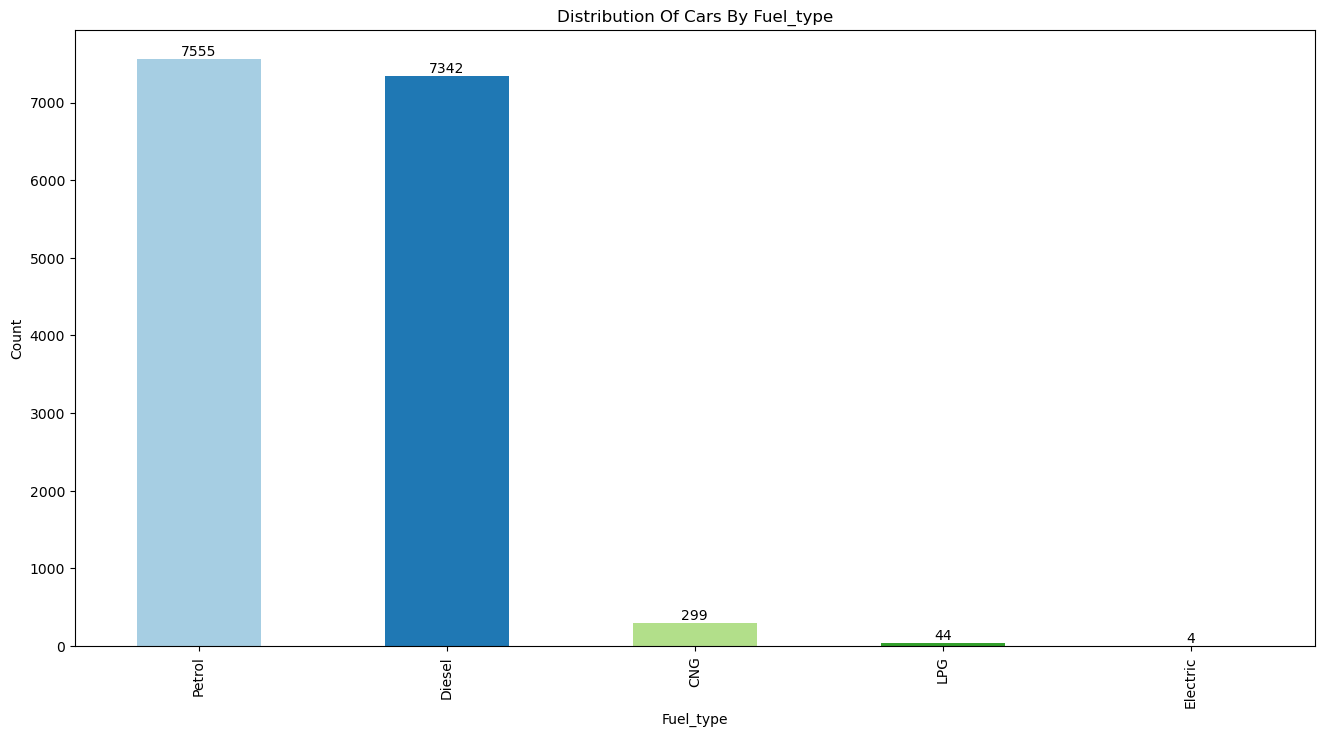

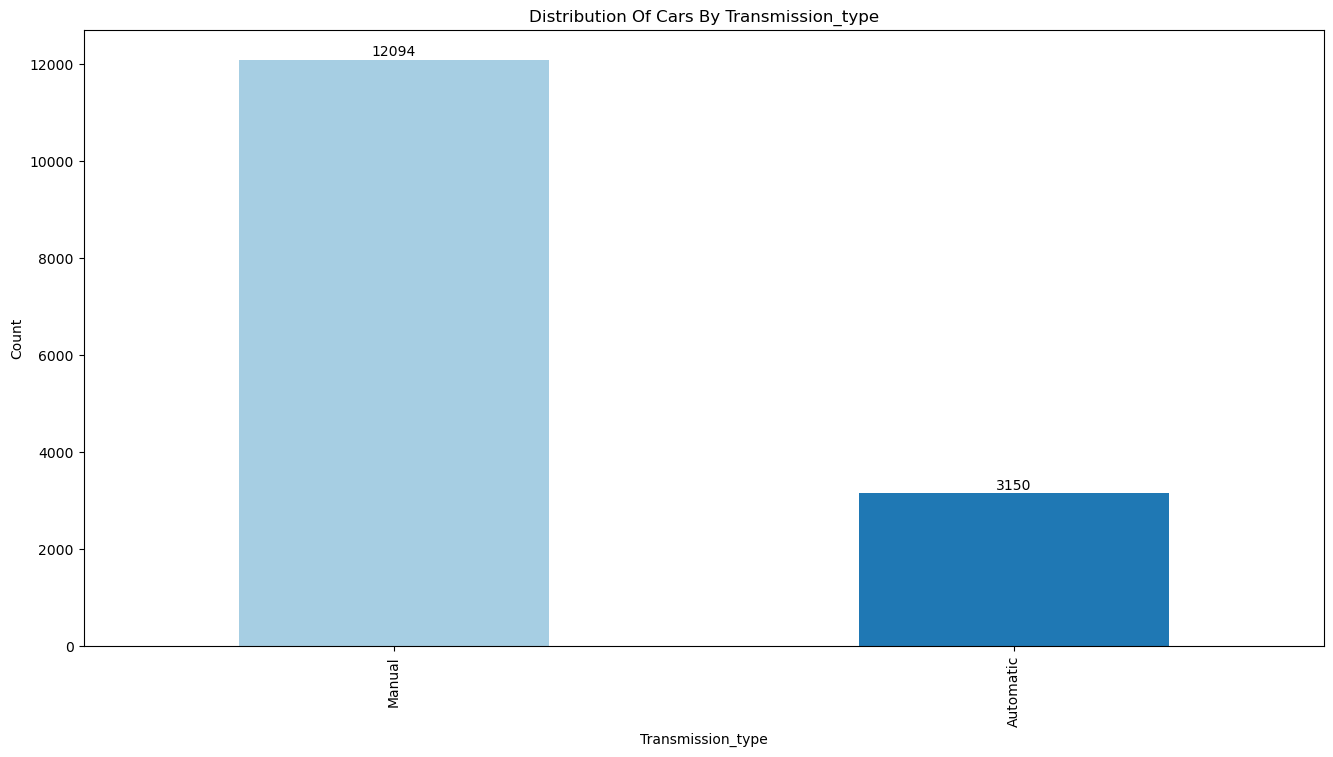

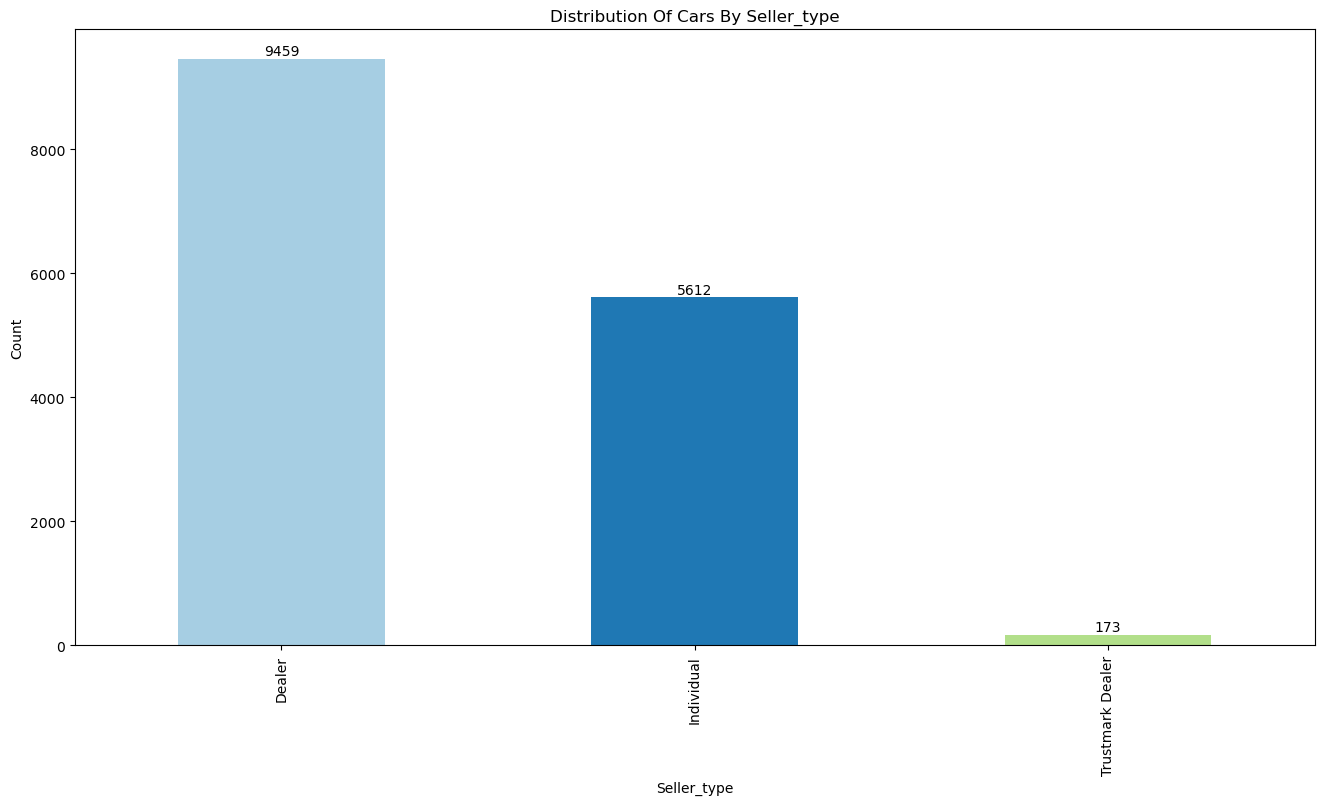

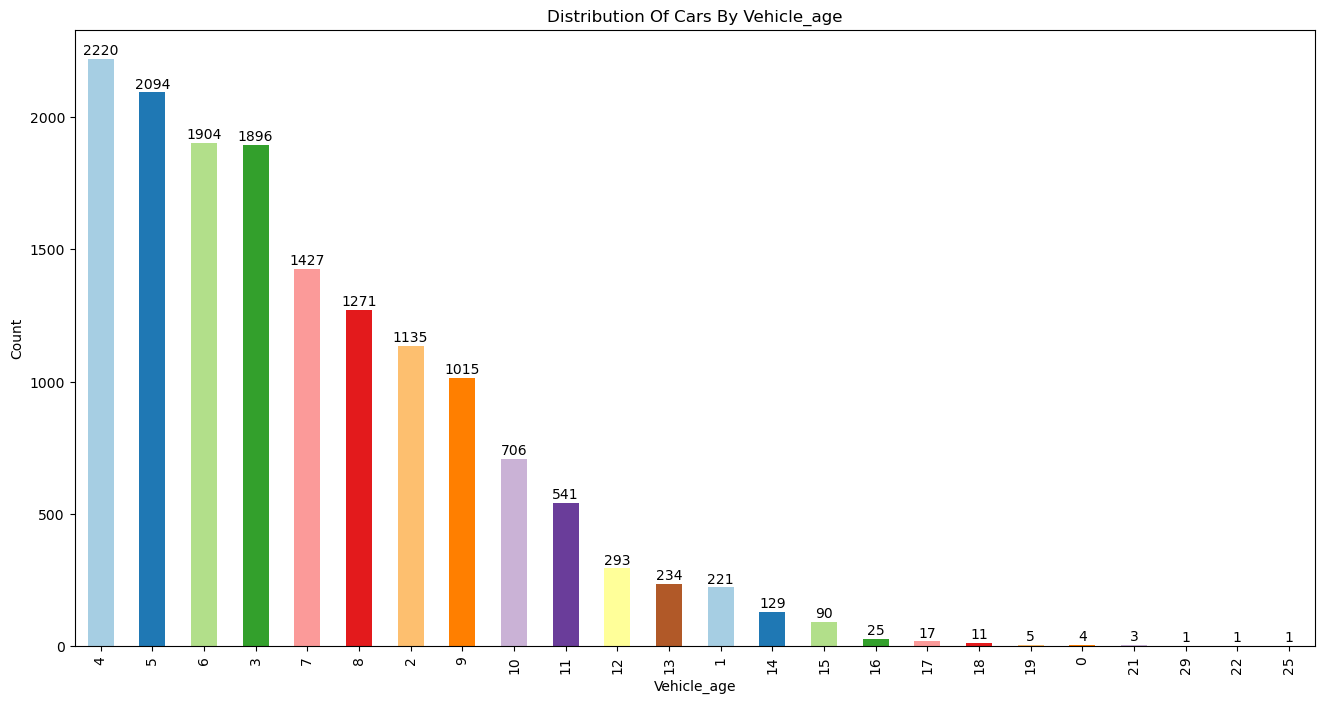

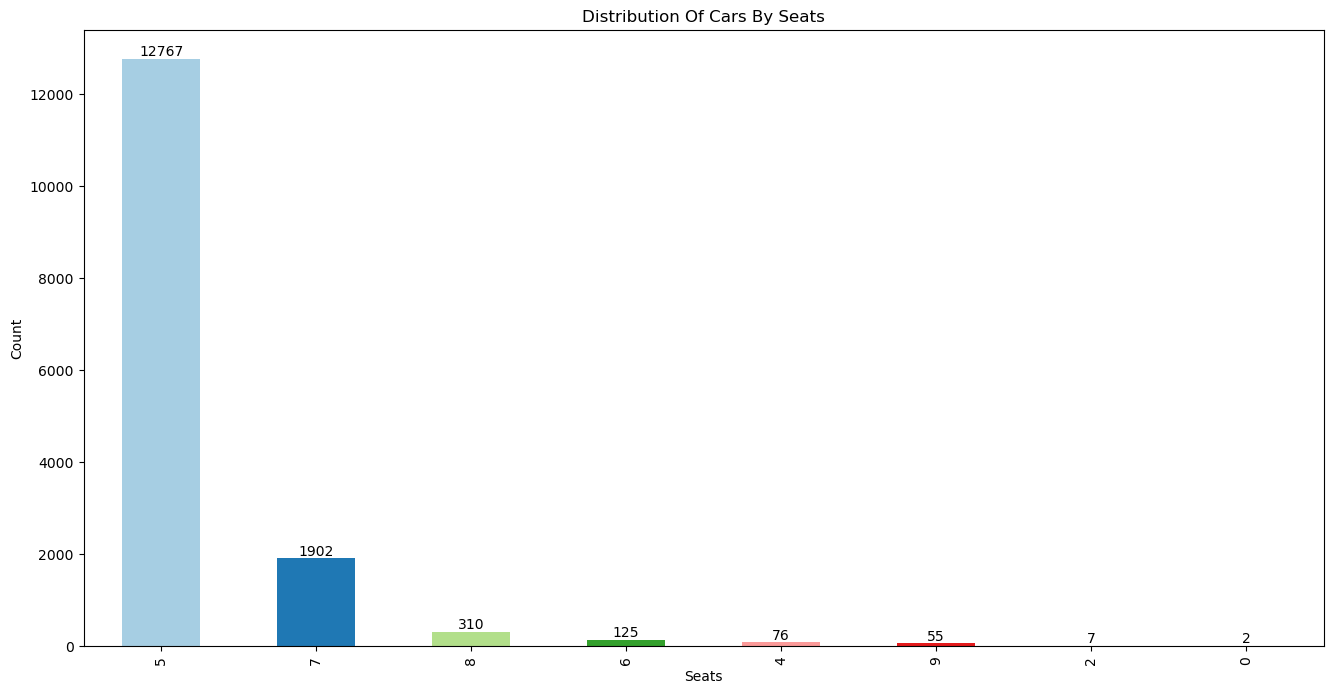

In [17]:
features = ["fuel_type","transmission_type","seller_type","vehicle_age","seats"]

palette = sns.color_palette("Paired")

for feature in features:
    plt.figure(figsize=(16,8))
    colors = palette[:cars_df[feature].nunique()]
    cars_df[feature].value_counts().plot(kind="bar",color =colors)
    plt.title(f"Distribution Of Cars By {str.capitalize(feature)}")
    for i, value in enumerate(cars_df[feature].value_counts()):
        plt.text(i, value + 5, str(value), ha ='center', va ="bottom")
    plt.xlabel(f"{str.capitalize(feature)}")
    plt.ylabel("Count")
    plt.show()

### **Disribution of Cars By Brands:**

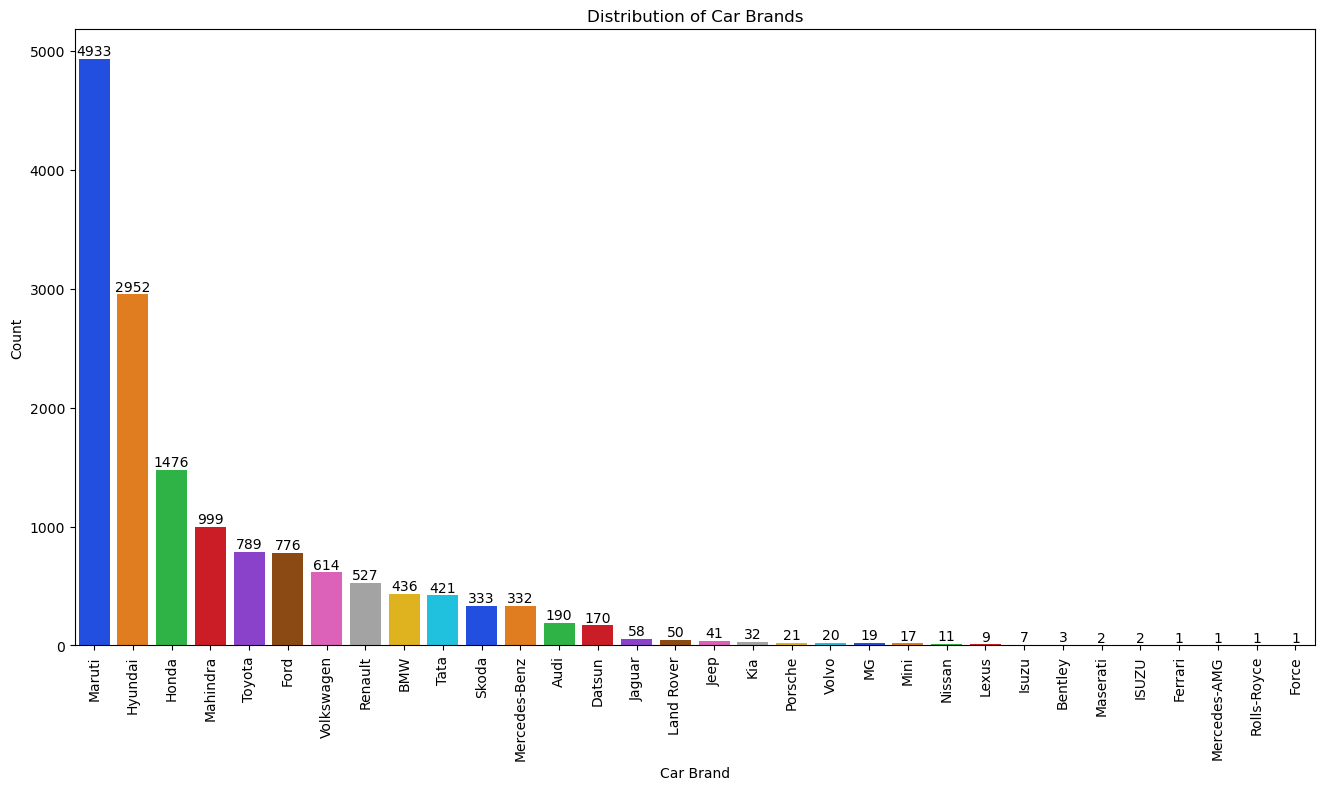

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x='brand', data=cars_df,order=cars_df['brand'].value_counts().index,palette="bright",)
plt.title('Distribution of Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Count')
for i ,value in enumerate(cars_df['brand'].value_counts()):
    plt.text(i,value +5 ,s = str(value),ha ="center" ,va ="bottom")
plt.xticks(rotation=90)
plt.show()

### Distribution of Top 50 Car Models

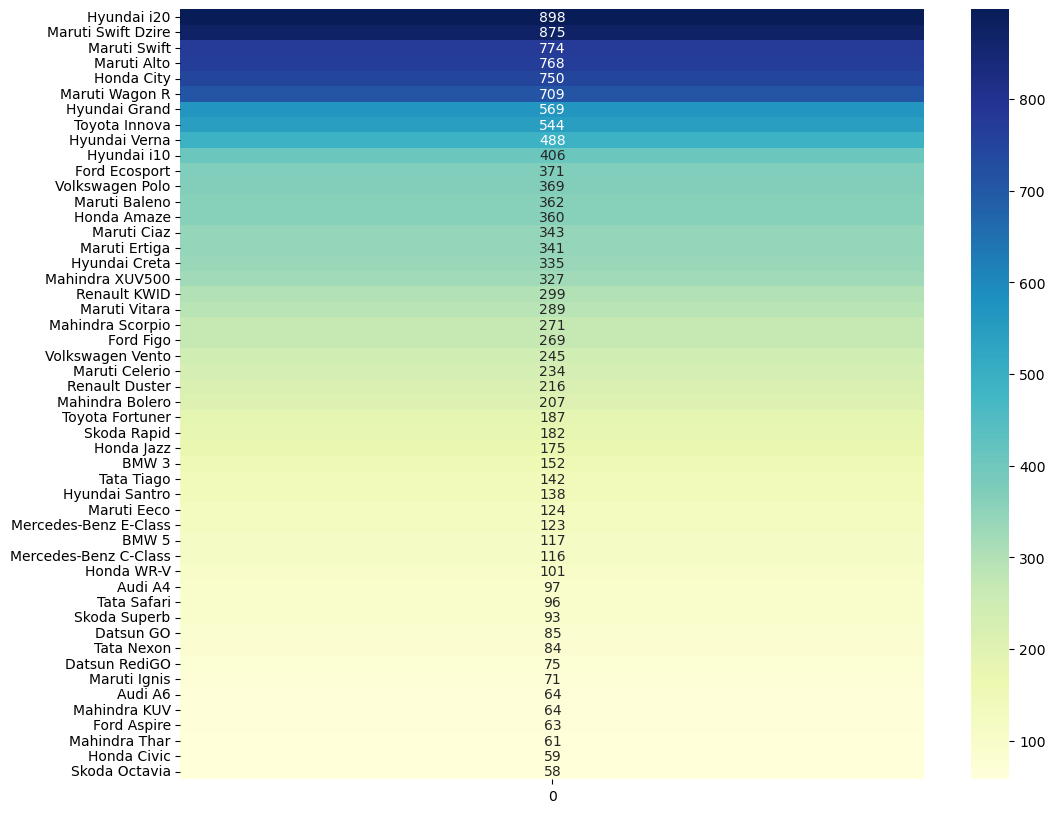

In [19]:
top_50_cars = cars_df["car_name"].value_counts().head(50)
plt.figure(figsize=(12,10))
sns.heatmap(top_50_cars.values.reshape(-1,1), annot=True, fmt="d", cmap="YlGnBu", yticklabels=top_50_cars.index)
plt.show()

### **INSIGHTS From Univariate Analysis:**

* No of cars based on **Fuel Type** are: 
    * Top two are **Petrol** (7555 cars) 49.5%  and **Diesel** (7342 cars) 48.16%.  
    * Combined they account for more than **97%** of the cars by fuel type.
---
* No of cars based on **Transmission Type** are:
    * **Manual** (12094 cars) 79.33%  and **Automatic** (3150 cars) 20.66%.
---
* No of cars based on **Seats** are:
    * Top three are **Five seater** (12767 cars) 83.75%  ,**7 seater owner** (1902 cars) 12.47% and **8 seater** (310 cars) 2.03%.  
    * Combined they account for more than **98%** of the cars by seats.
--- 
* No of cars based on **Seller Type** are:
    * **Individual** (5612 cars) 36.81%  ,**Trustmark Dealer** (173 cars) 1.13% , **Dealer** (9459 cars) 62.05%%.
---   
* No of cars based on **Vehicle Age** are:
    * The top five vehicle ages are **4 years** (2220 cars, 14.56%), **5 years** (2094 cars, 13.73%), **6 years** (1904 cars, 12.49%), **3 years** (1896 cars, 12.43%), and **7 years** (1427 cars 9.36%) 
    * Combined they account for more than **60%** of the cars sold by owners based on the year the cars were bought.
--- 
* **Top 5 selling cars based on the Model** are:
    * **Hyundai i20**        - (898 cars) 5.89%
    * **Maruti Swift Dzire** - (875 cars) 5.74%
    * **Maruti Swift**       - (774 cars) 5.07%
    * **Maruti Alto**        - (768 cars) 5.03%
    * **Honda City**         - (750 cars) 4.92%
  
  **These 5 cars accounts for more than **25%** of total cars sold.**
--- 
* **Top 5 selling cars based on the Brand** are:
    * **Maruti**   - (1072 cars) 32.36%
    * **Hyundai**  - (637 cars)  19.36%
    * **Honda**    - (220 cars)  9.68%
    * **Mahindra** - (328 cars)  6.55%
    * **Toyota**   - (308 cars)  5.17% 

  **These top 5 brands account for more than 70% of the cars sold.**


### **Total sales of cars by Different Features**

In [20]:
total_sales_of_all_cars = cars_df["selling_price"].sum()
total_sales_of_all_cars

11809548875

**Total sales of all cars is 1,180.95 crores INR**

### **Sales of Top 50 cars(individually):**

**since there are many car model i am taking only top 50 selling cars for visual**

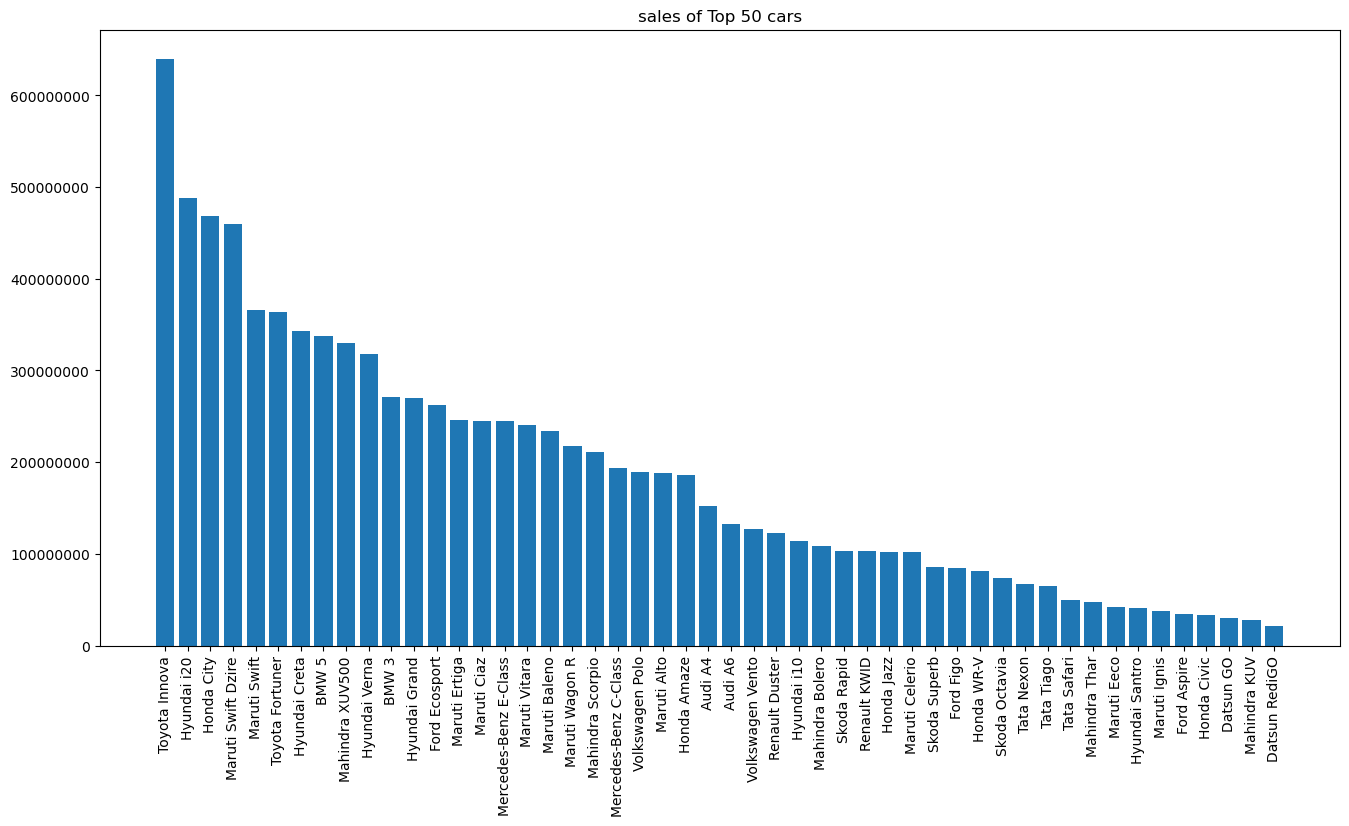

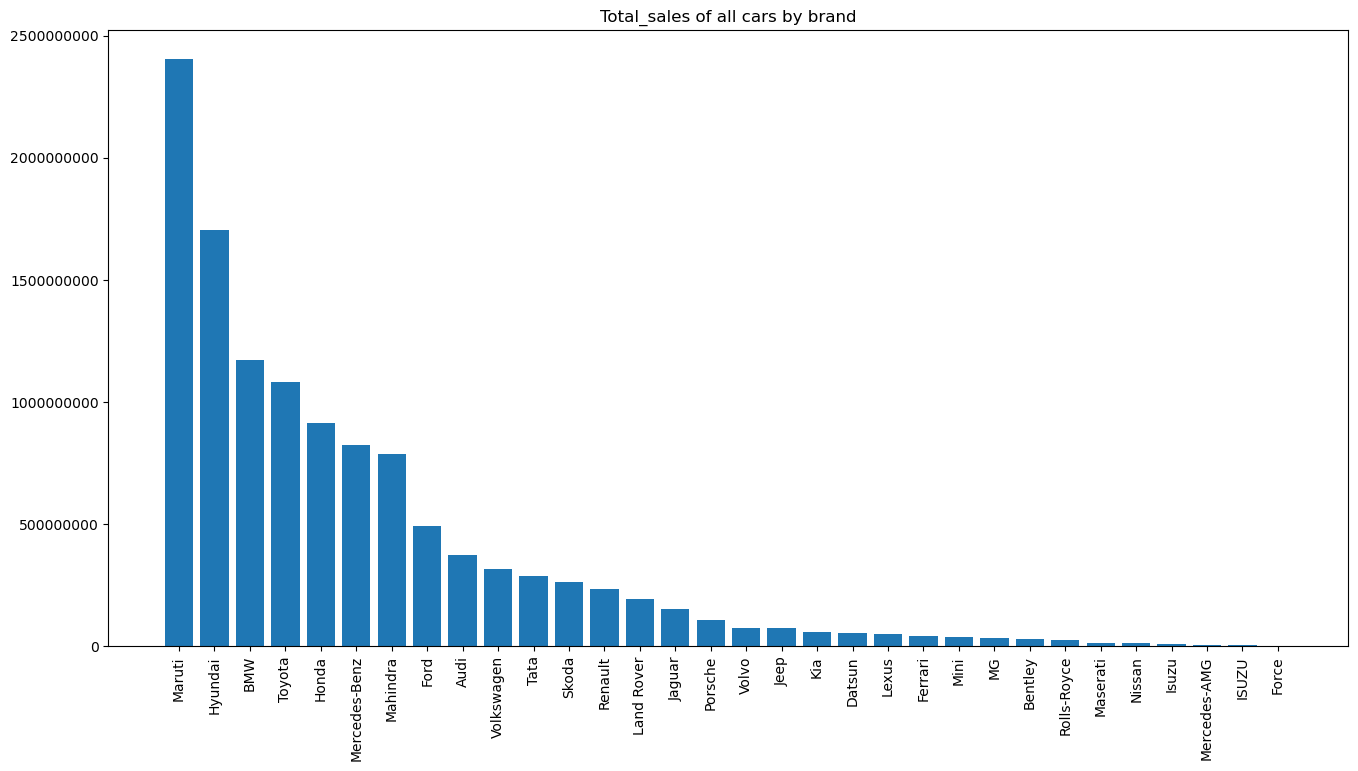

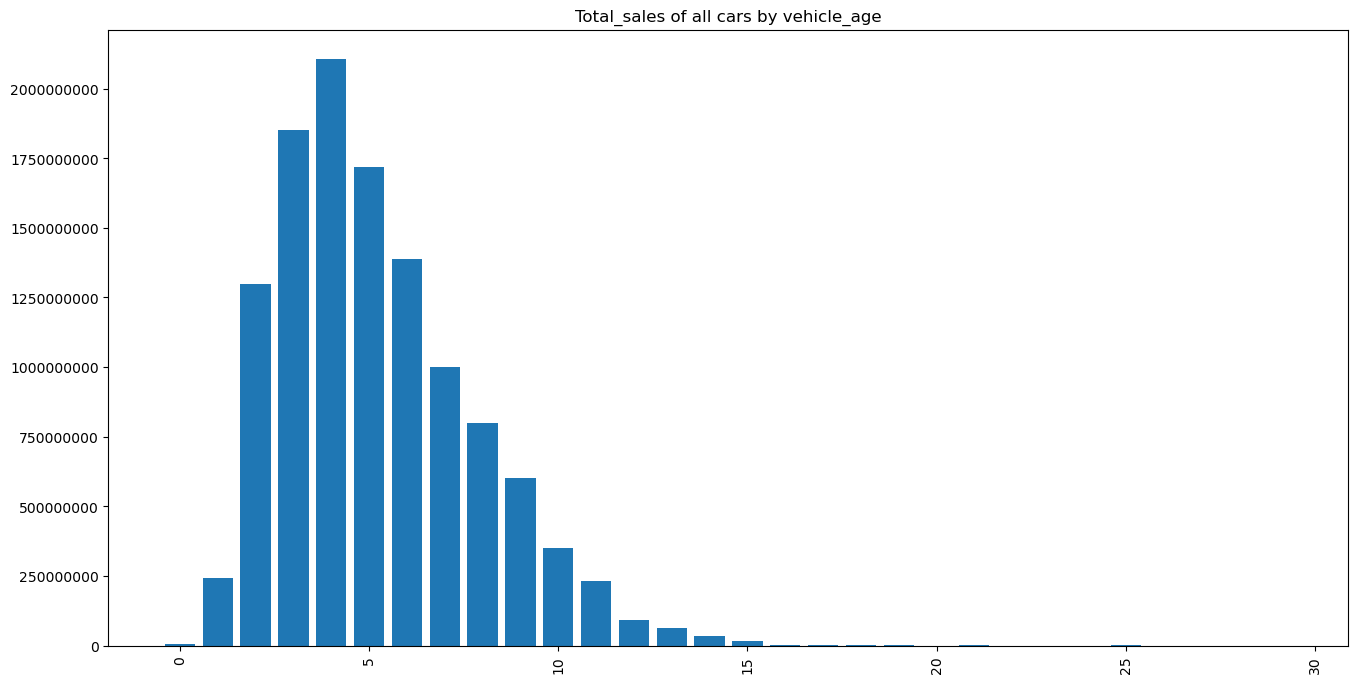

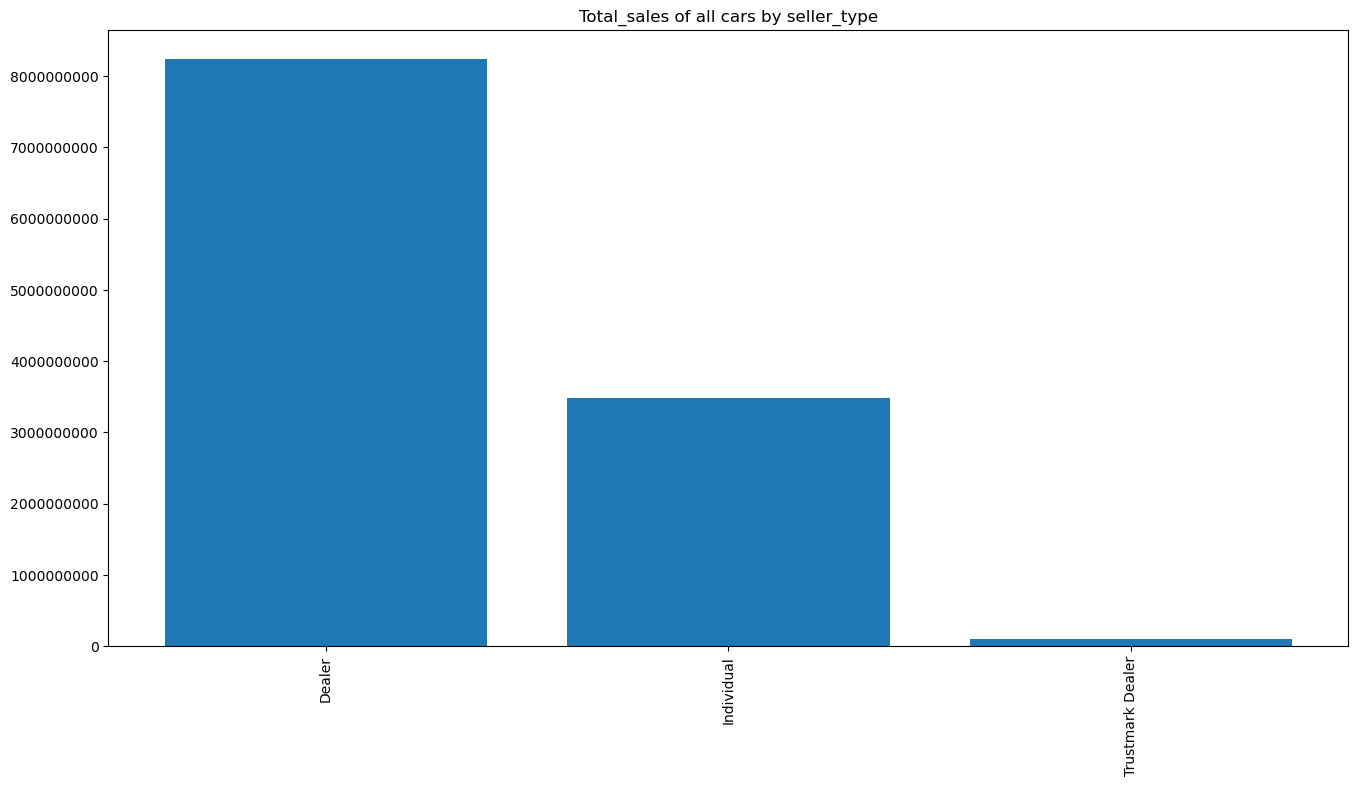

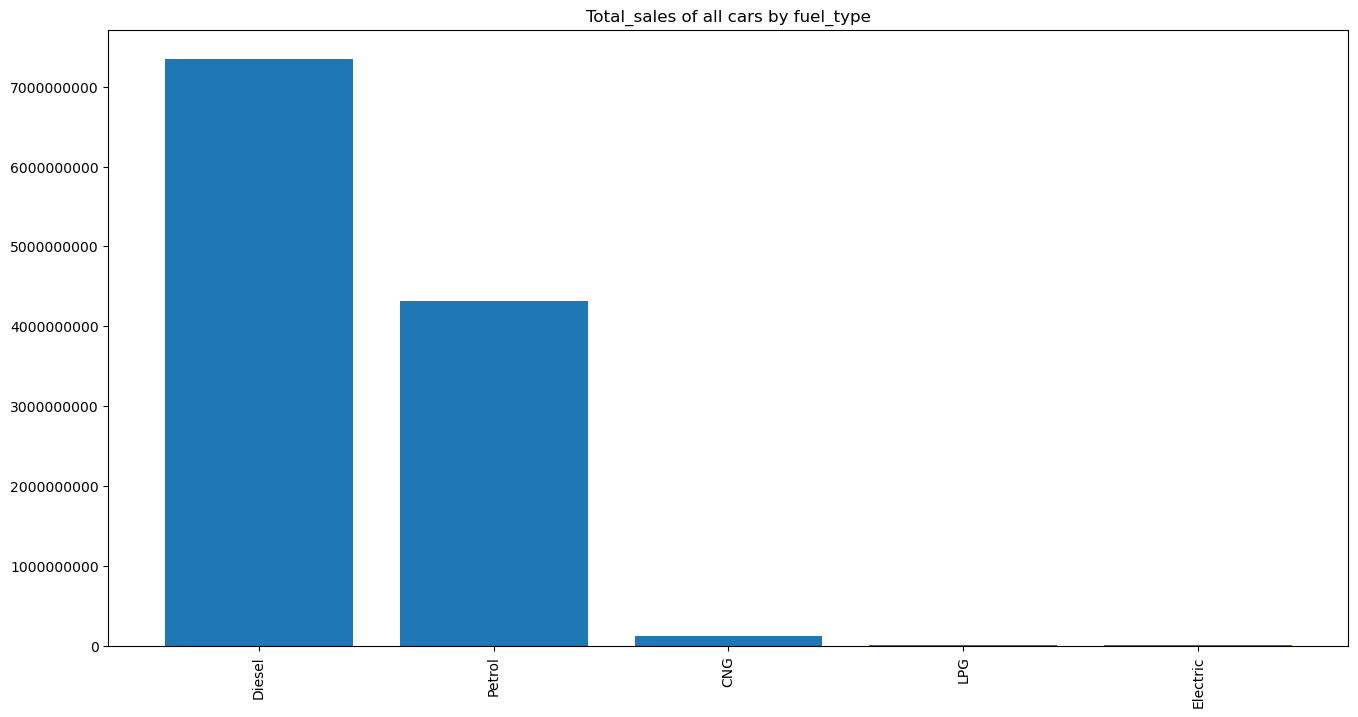

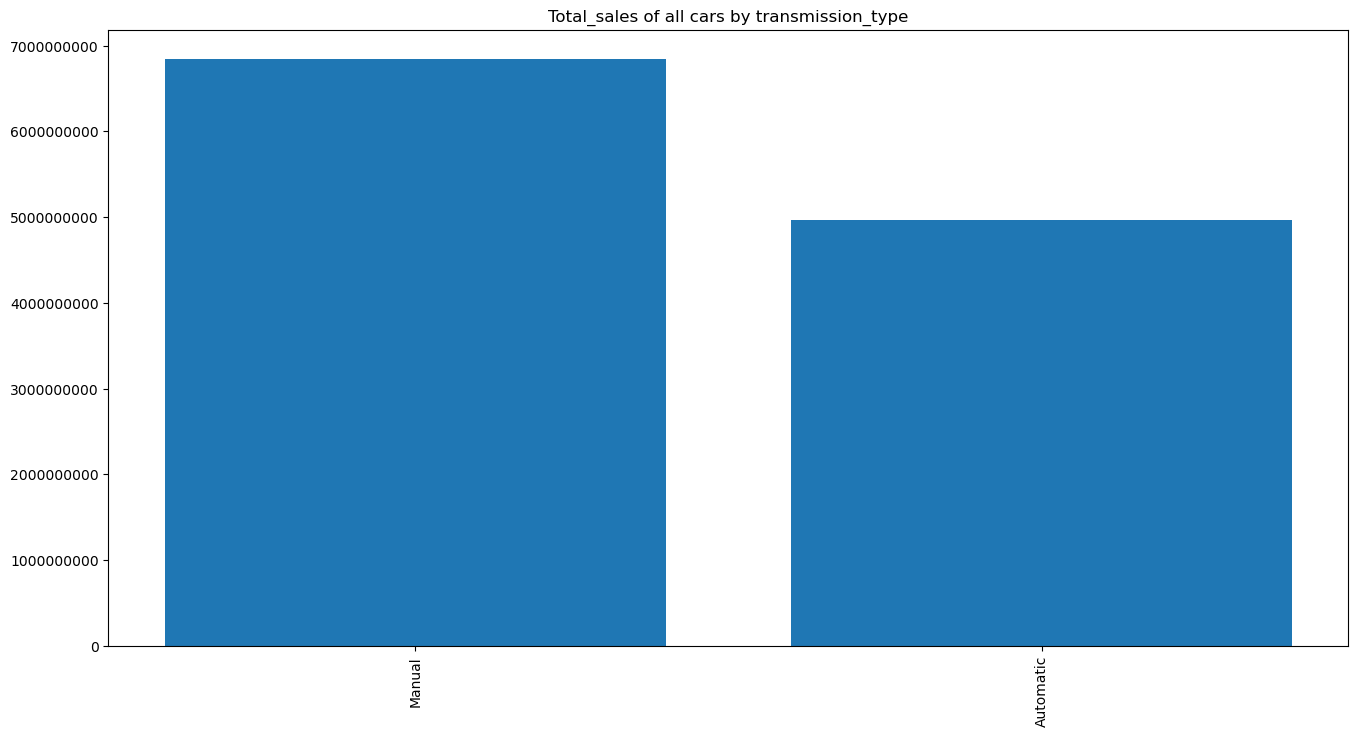

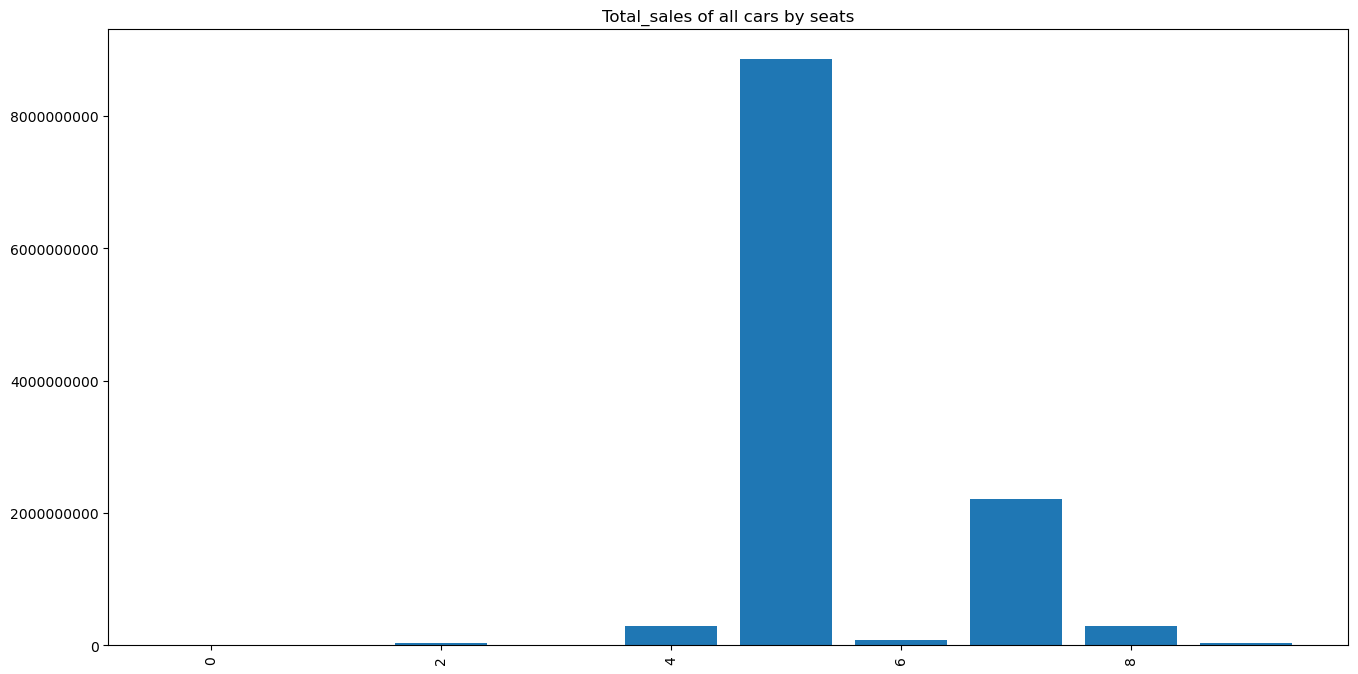

In [21]:
for i in cars_df.columns.drop(["km_driven", "mileage", "engine", "max_power", "selling_price"]):
    plt.figure(figsize=(16,8))
    plt.ticklabel_format(style='plain') 
    if i == "car_name":
        Total_sales = cars_df[cars_df["car_name"].isin(list(top_50_cars.index))].groupby("car_name")["selling_price"].sum().sort_values(ascending = False)
        plt.title("sales of Top 50 cars")
    else:
        Total_sales = cars_df.groupby(i)["selling_price"].sum().sort_values(ascending = False) 
        plt.title(f"Total_sales of all cars by {i}")
    plt.bar(Total_sales.index ,Total_sales.values)
    plt.xticks(rotation =90)
    plt.show()

#### **Sales of cars by km_driven:**

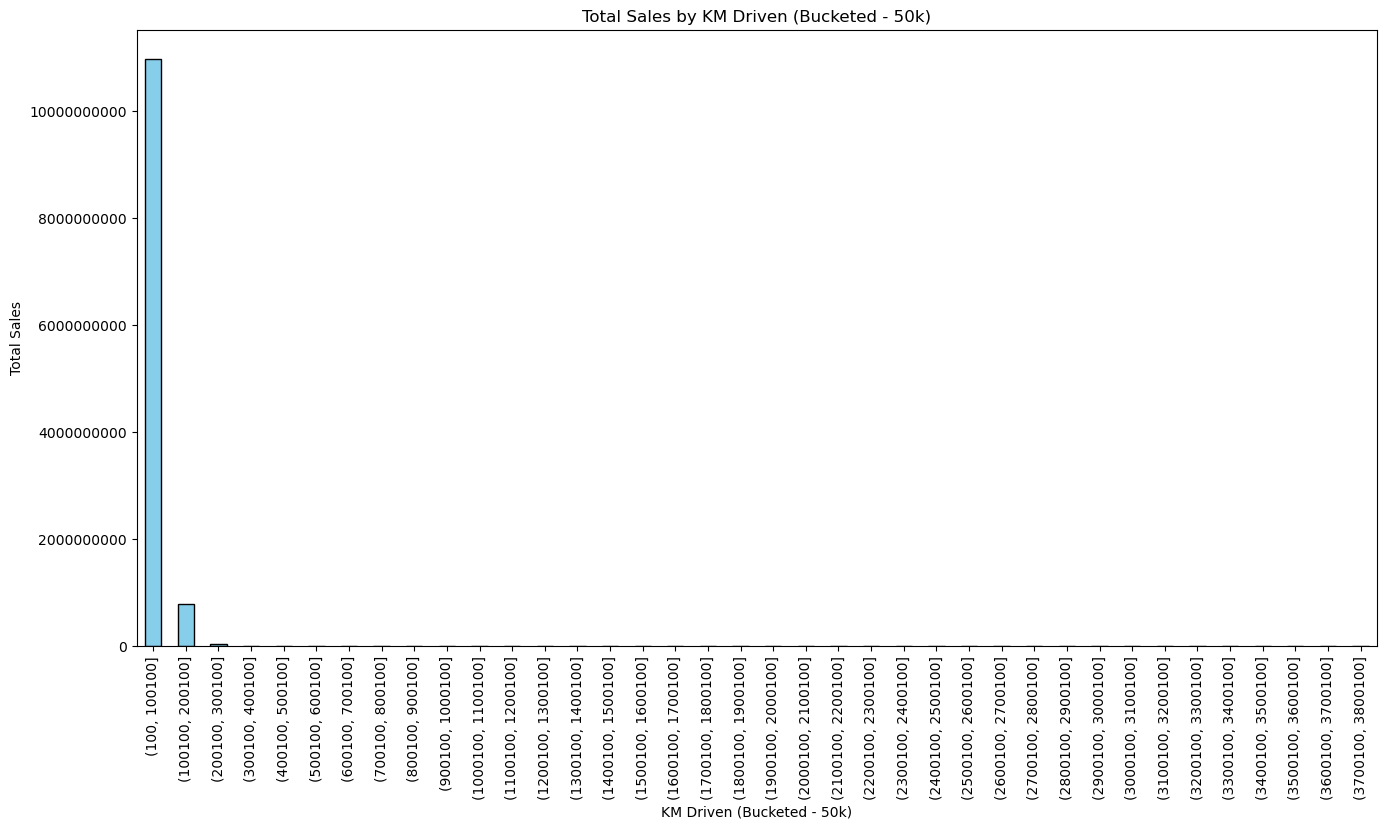

In [22]:
bins_50k = range(100, 3800000+100000, 100000)  # Bin edges for 50k intervals
cars_df['km_bucketed_50k'] = pd.cut(cars_df['km_driven'], bins=bins_50k)

Total_sales_50k = cars_df.groupby('km_bucketed_50k')['selling_price'].sum()

plt.figure(figsize=(16, 8))
plt.ticklabel_format(style='plain')
Total_sales_50k.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by KM Driven (Bucketed - 50k)')
plt.xlabel('KM Driven (Bucketed - 50k)')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


In [23]:
def plot_binned_sales(feature, bin_size):

    min_val = cars_df[feature].min()
    max_val = cars_df[feature].max()
    bins = np.arange(min_val, max_val + bin_size, bin_size) 
    
    cars_df[f'{feature}_bucketed'] = pd.cut(cars_df[feature], bins=bins)

    total_sales = cars_df.groupby(f'{feature}_bucketed')['selling_price'].sum()
    
    plt.figure(figsize=(16, 8))
    plt.ticklabel_format(style='plain')
    total_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Total Sales by {feature} (Bucketed - {bin_size})')
    plt.xlabel(f'{feature} (Bucketed - {bin_size})')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.show()

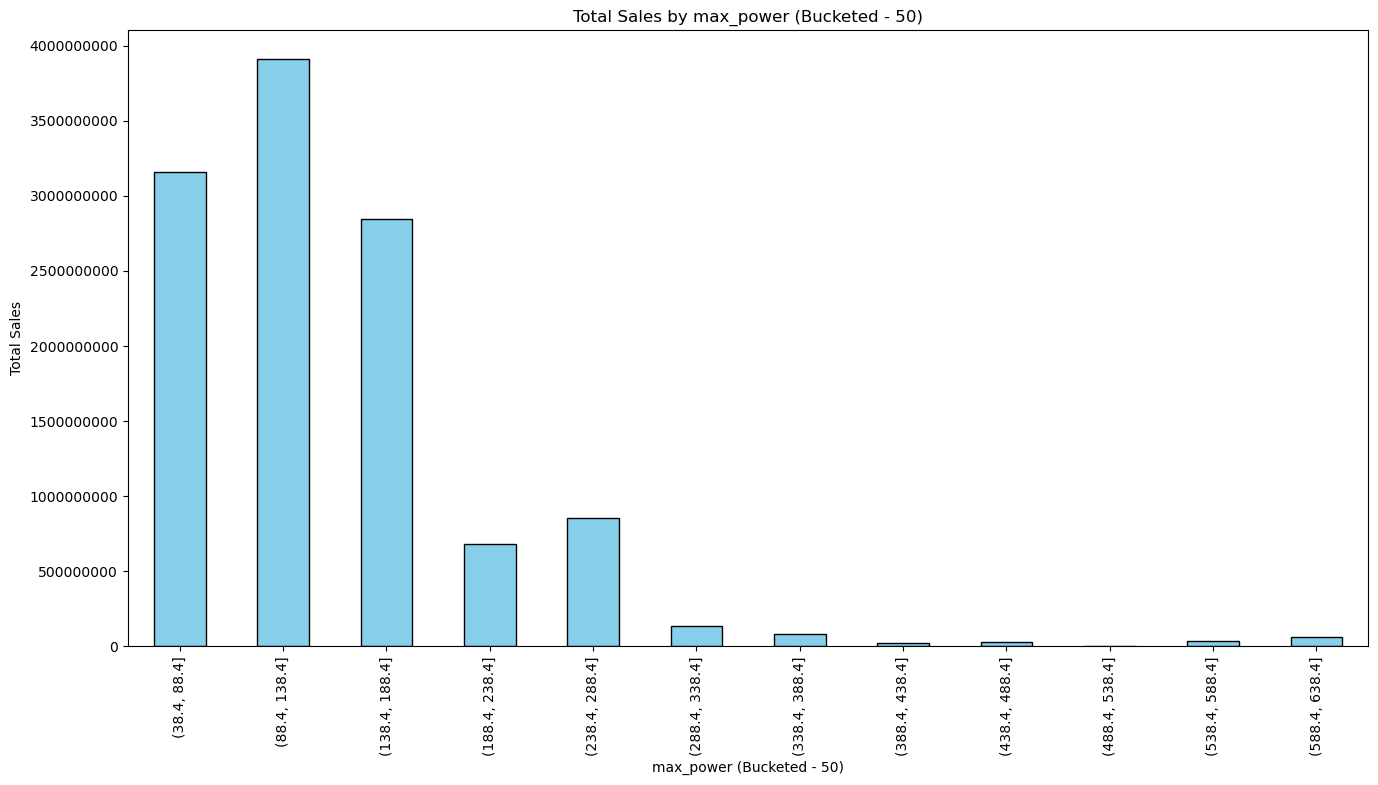

In [24]:
plot_binned_sales("max_power", 50)    

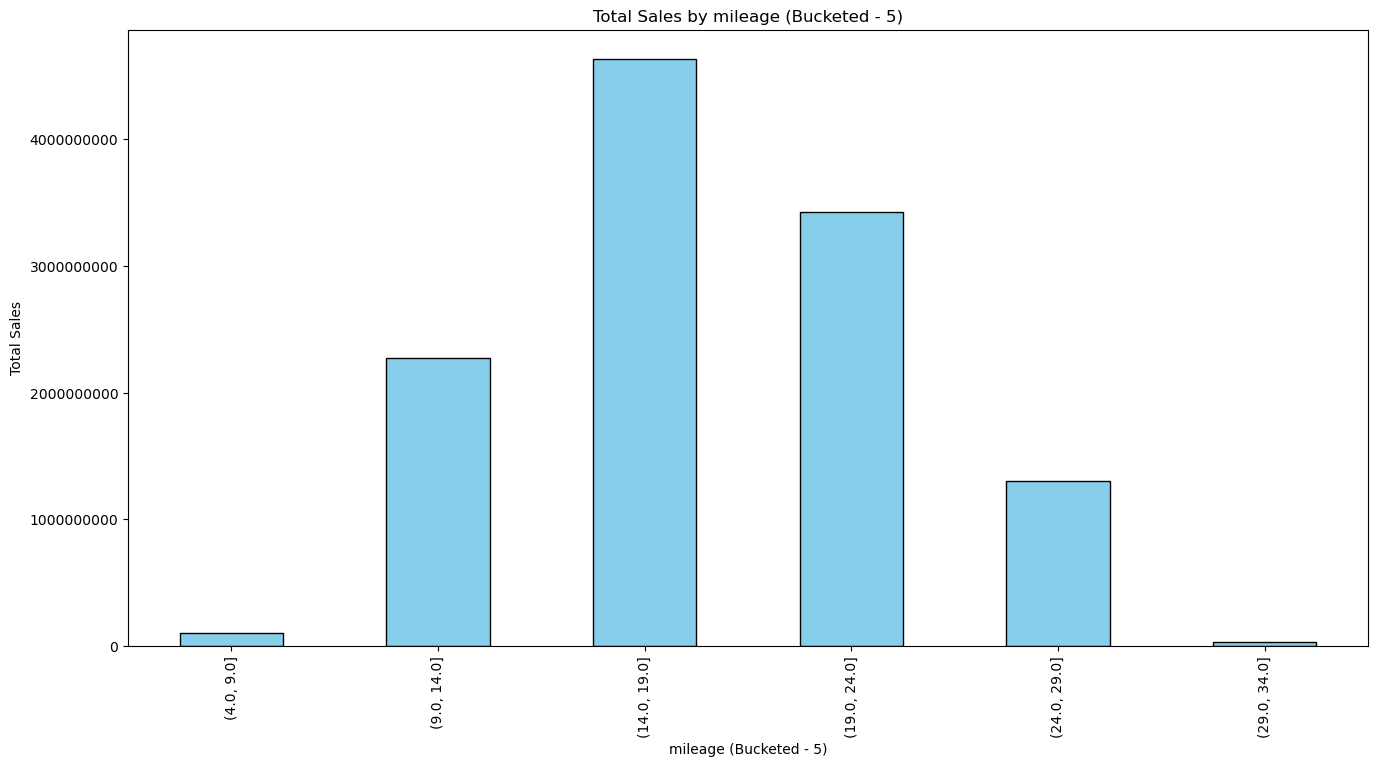

In [25]:
plot_binned_sales("mileage", 5)        

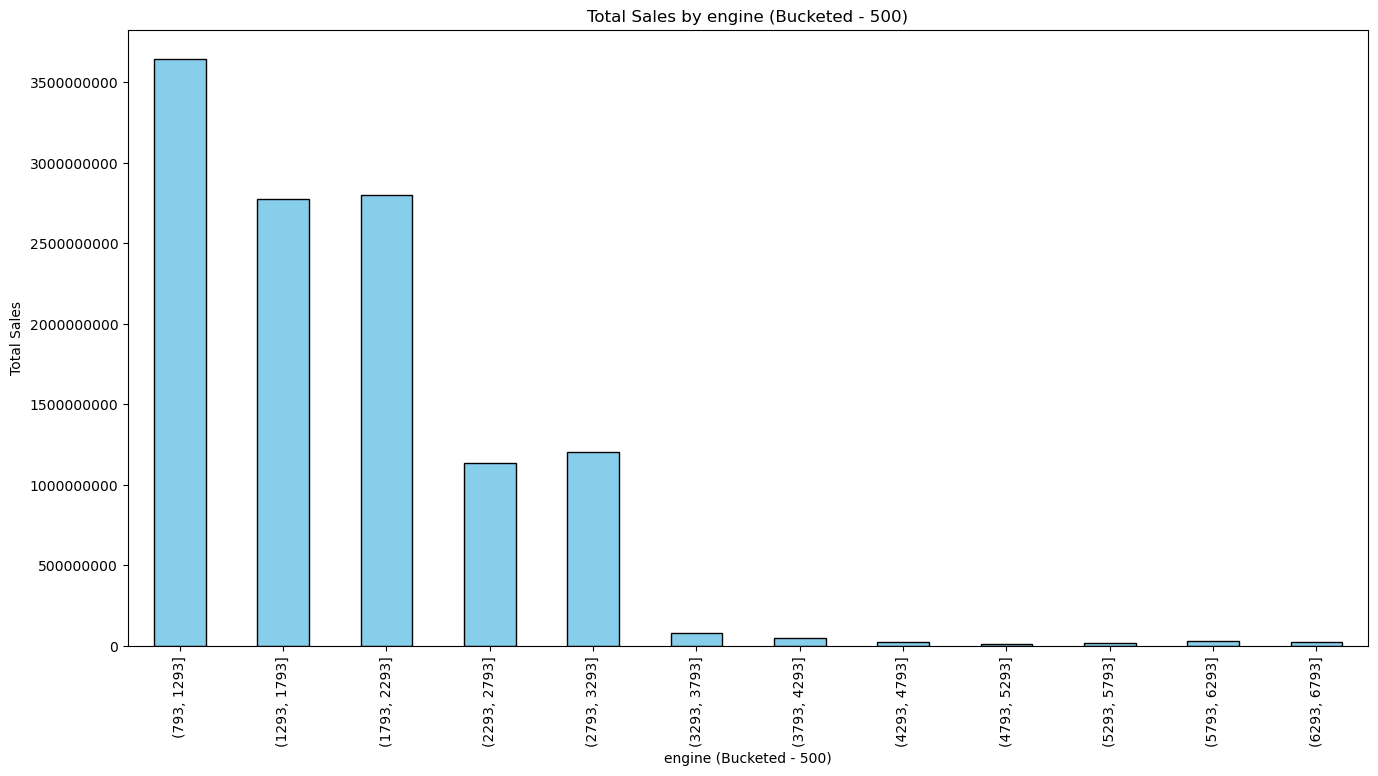

In [26]:
plot_binned_sales("engine", 500)  

In [27]:
cars_df.columns

Index(['car_name', 'brand', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price', 'km_bucketed_50k', 'max_power_bucketed',
       'mileage_bucketed', 'engine_bucketed'],
      dtype='object')

In [28]:
cars_df.drop(columns=["km_bucketed_50k","max_power_bucketed","mileage_bucketed","engine_bucketed"],inplace =True)

### **Insights From Bivariate Analysis By Total Sales:**

* **Total** sales of all cars amount to **1180.95 crores INR**.
 
* Out of which  **Maruti** Brand cars alone sold for more than **200 crores INR** and Maruti **swift Dzire** alone sold for more than **40 crores INR** but **Toyota Innova** tops the sales with more than **60 crores INR**.

* we can clearly see when the **km driven** by the cars **increases** the **sales** of the cars **decreases**.

* **Diesel** Based cars sold for more than **700 crores INR**.
.
* **Manual** Transmission cars are sold for more than **600 crores INR**.

* **5 seater** cars are sold for more than **800 crores INR**.

* Total sales of the cars with engine power between **700 and 2300** alone accounts for more than **850 crores INR**.

### **Median selling price of cars by Different Features:**

### **Median selling price of Top 50 cars:**

#### **since there are many car model we are taking only top 50 selling cars**

In [29]:
cars_df[cars_df["car_name"].isin(list(top_50_cars.index))].groupby("car_name")["selling_price"].median()

car_name
Audi A4                  1375000.0
Audi A6                  1763000.0
BMW 3                    1650000.0
BMW 5                    2600000.0
Datsun GO                 350000.0
Datsun RediGO             270000.0
Ford Aspire               530000.0
Ford Ecosport             675000.0
Ford Figo                 275000.0
Honda Amaze               475000.0
Honda City                620000.0
Honda Civic               295000.0
Honda Jazz                600000.0
Honda WR-V                800000.0
Hyundai Creta            1000000.0
Hyundai Grand             475000.0
Hyundai Santro            240000.0
Hyundai Verna             592500.0
Hyundai i10               275000.0
Hyundai i20               550000.0
Mahindra Bolero           525000.0
Mahindra KUV              420000.0
Mahindra Scorpio          800000.0
Mahindra Thar             825000.0
Mahindra XUV500           945000.0
Maruti Alto               250000.0
Maruti Baleno             639500.0
Maruti Celerio            449500.0
Maruti Ciaz

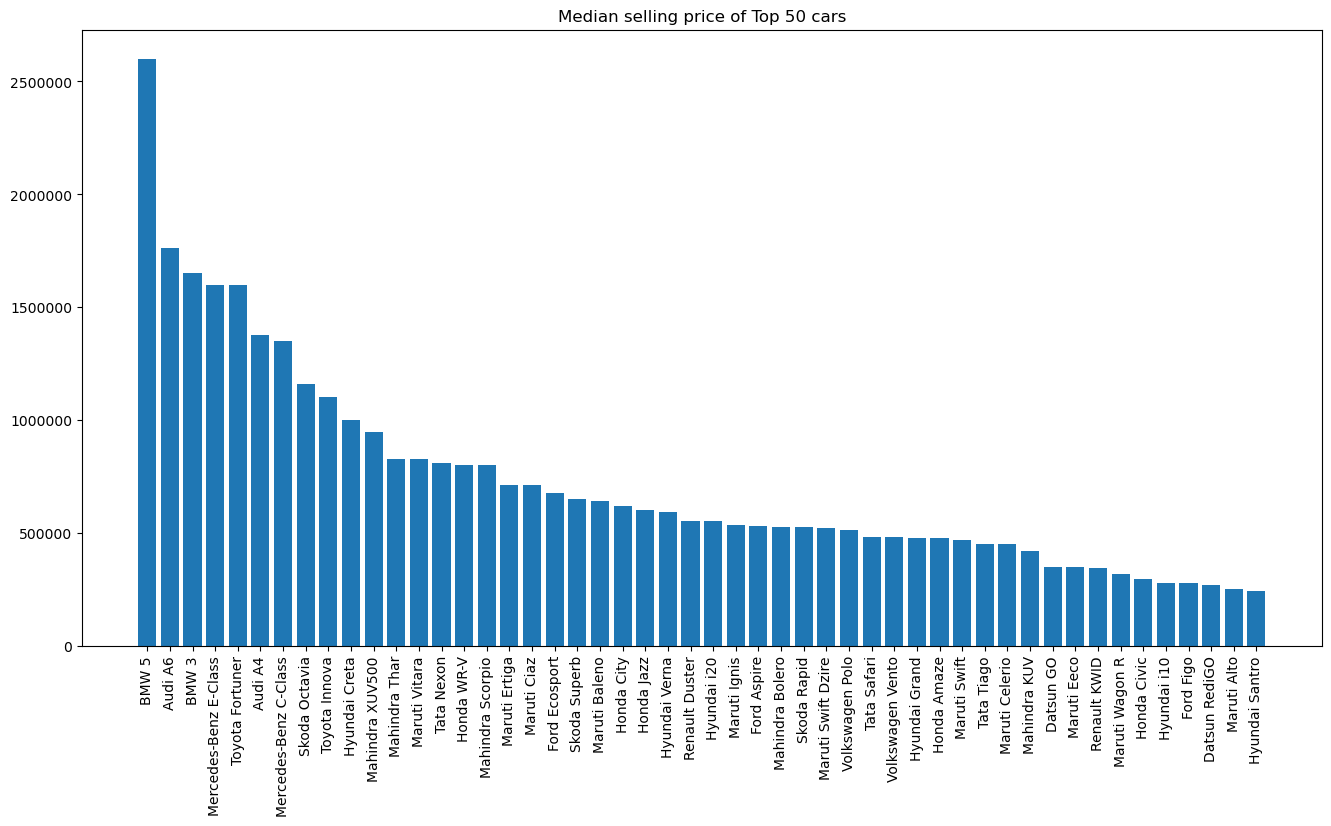

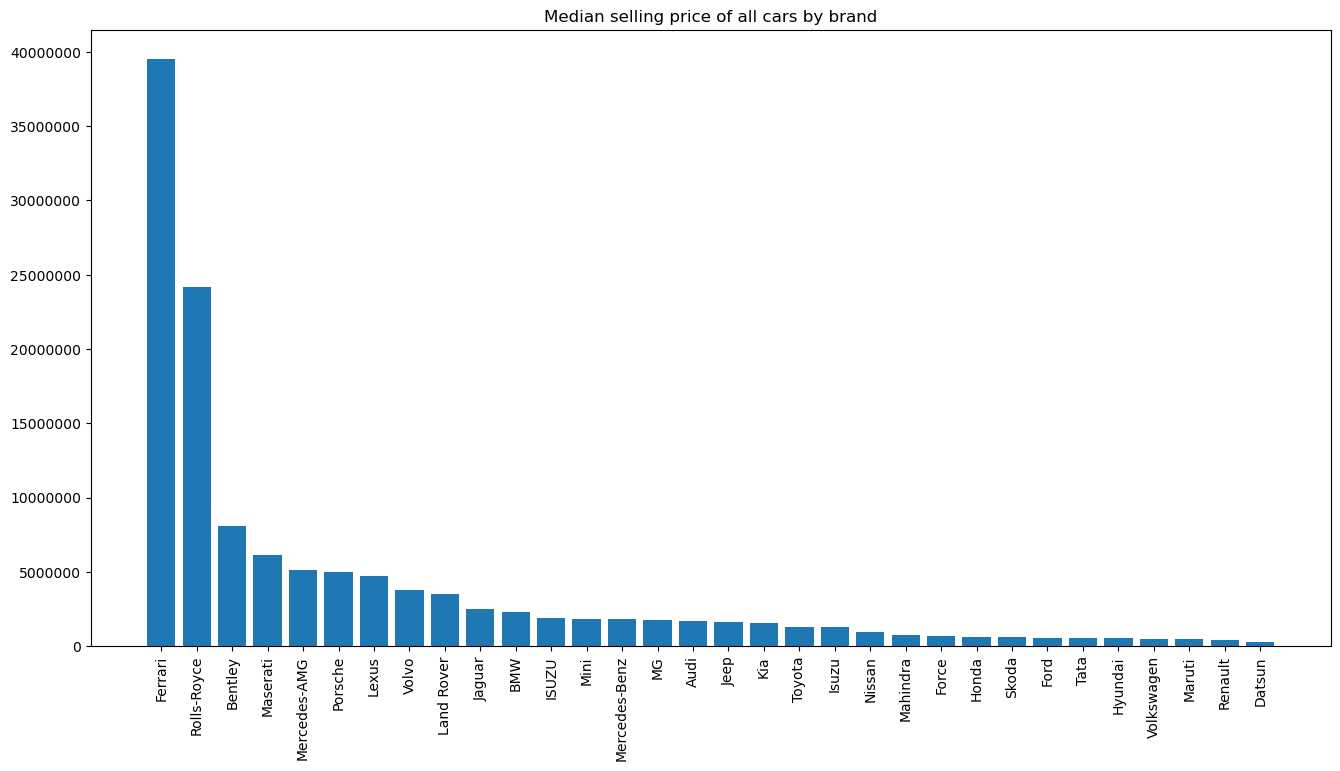

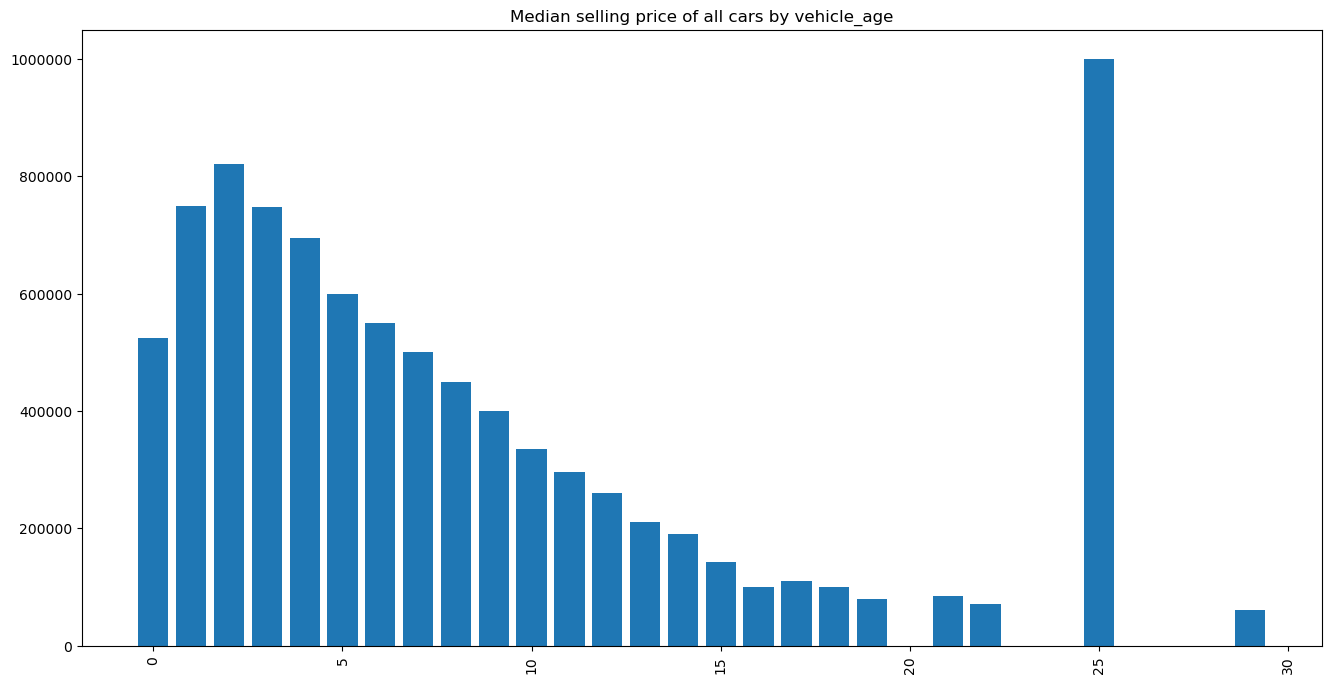

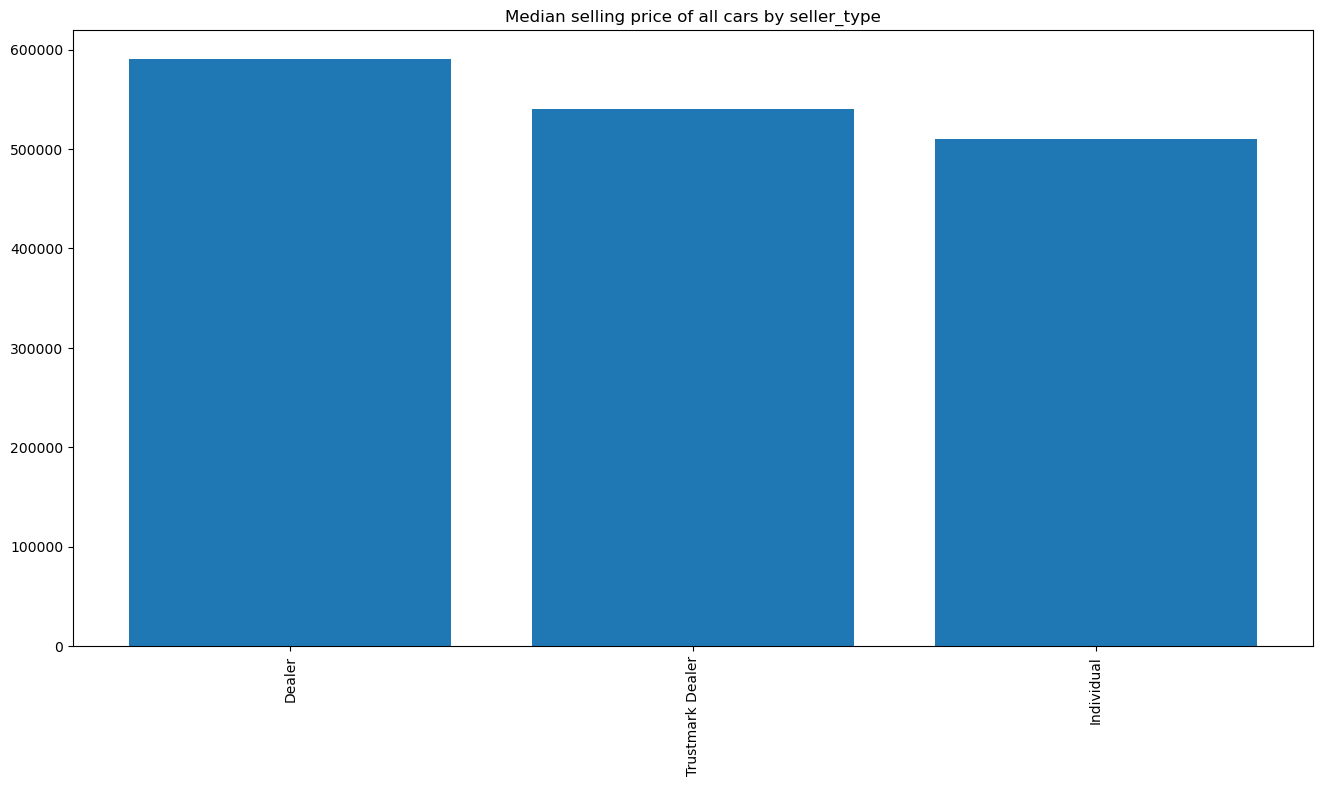

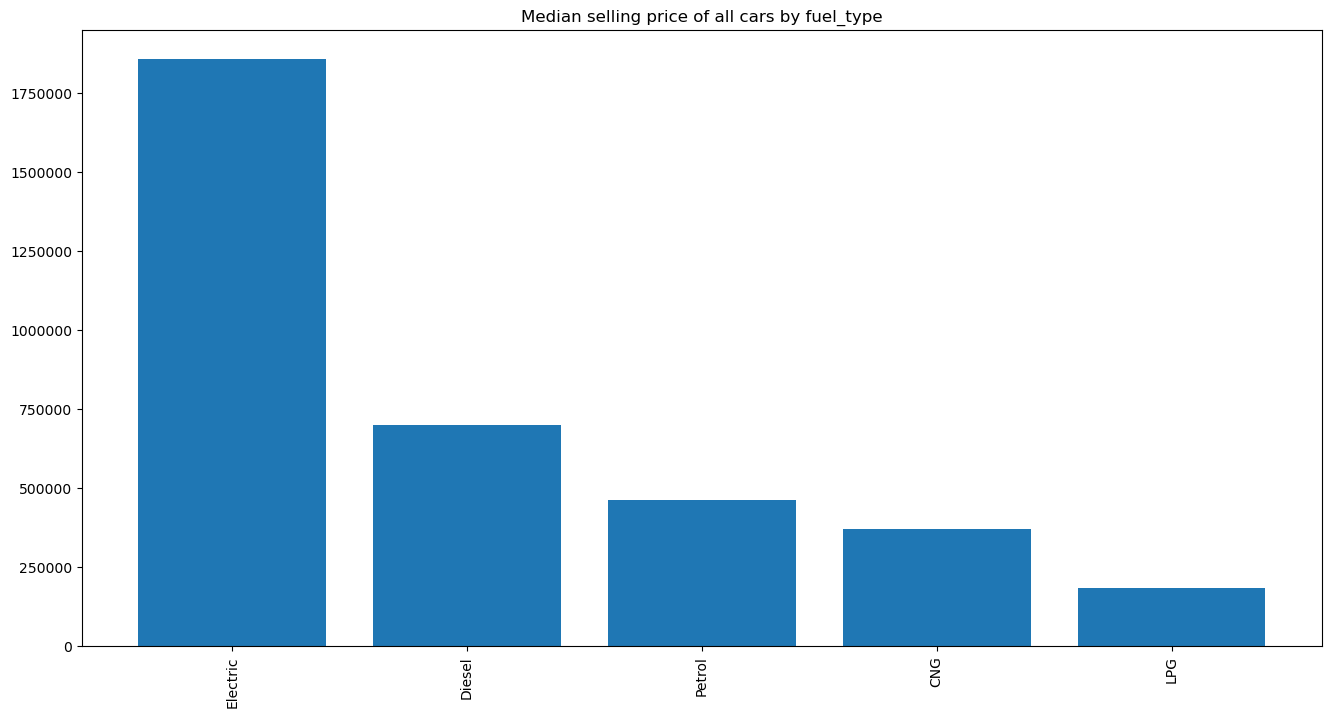

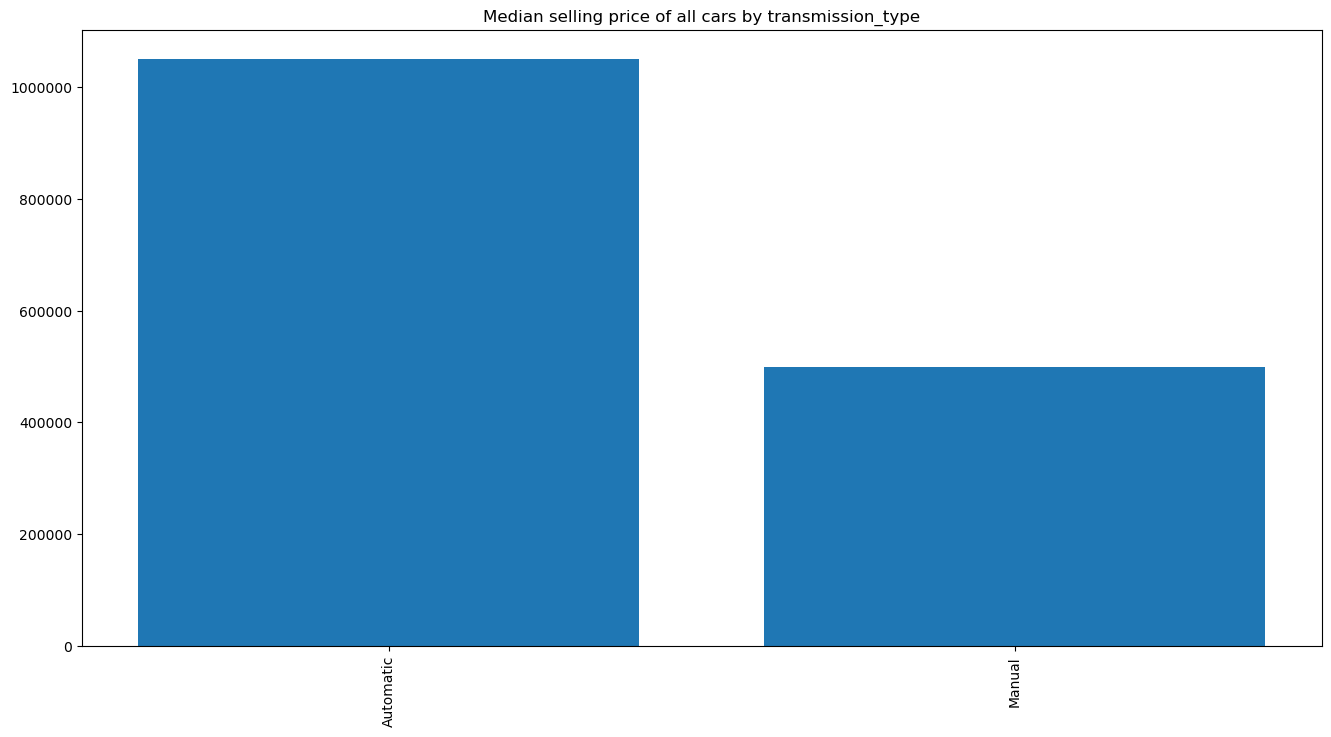

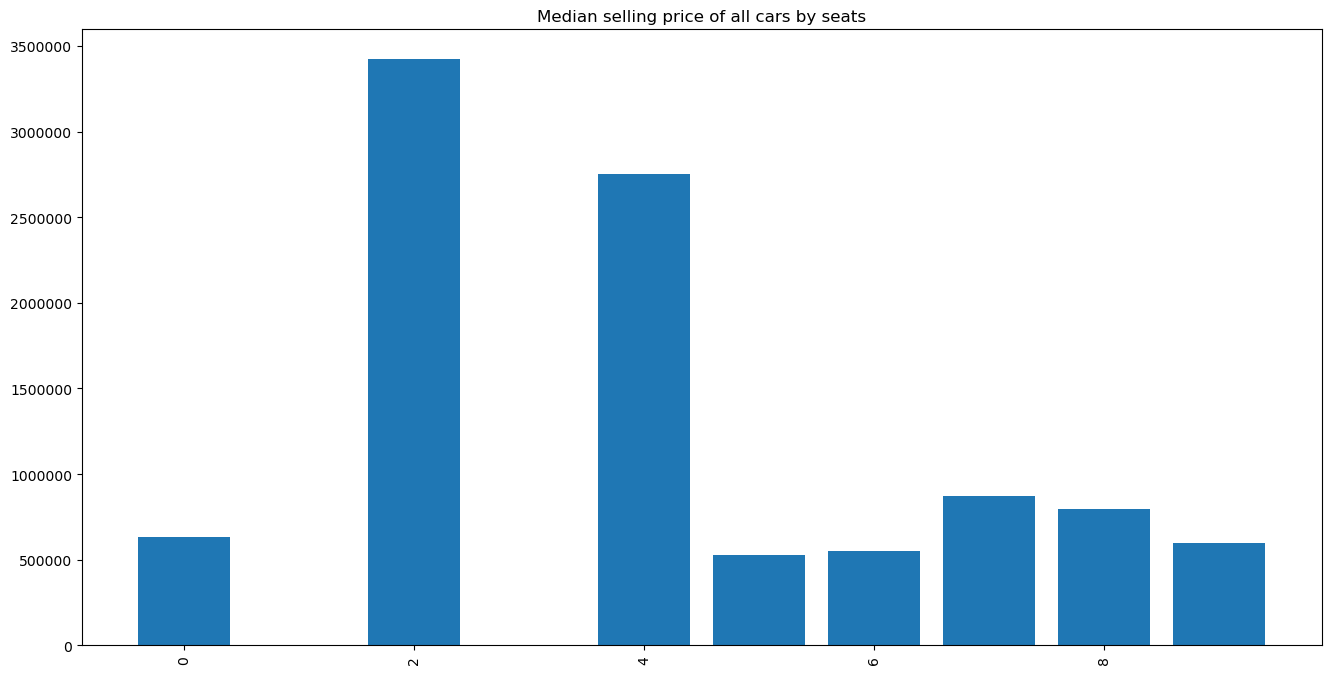

In [30]:
for i in cars_df.columns.drop(["km_driven", "mileage", "engine", "max_power", "selling_price"]):
    plt.figure(figsize=(16,8))
    plt.ticklabel_format(style='plain')
    if i == "car_name":
        median_selling_prices = cars_df[cars_df["car_name"].isin(list(top_50_cars.index))].groupby("car_name")["selling_price"].median().sort_values(ascending = False)
        plt.title("Median selling price of Top 50 cars")
    else:
        median_selling_prices = cars_df.groupby(i)["selling_price"].median().sort_values(ascending = False)
        plt.title(f"Median selling price of all cars by {i}")
    plt.bar(median_selling_prices.index ,median_selling_prices.values)
    plt.xticks(rotation =90)
    plt.show()

#### **Median selling price of cars by km_driven:**

In [31]:
def plot_binned_sales(feature, bin_size):

    min_val = cars_df[feature].min()
    max_val = cars_df[feature].max()
    bins = np.arange(min_val, max_val + bin_size, bin_size) 
    
    cars_df[f"{feature}_bucketed"] = pd.cut(cars_df[feature], bins=bins)

    median_sales = cars_df.groupby(f"{feature}_bucketed")['selling_price'].median()
    
    plt.figure(figsize=(16, 8))
    plt.ticklabel_format(style='plain')
    median_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Median Sales by {feature} (Bucketed - {bin_size})")
    plt.xlabel(f"{feature} (Bucketed - {bin_size})")
    plt.ylabel("Median Sales")
    plt.xticks(rotation=90)
    plt.show()

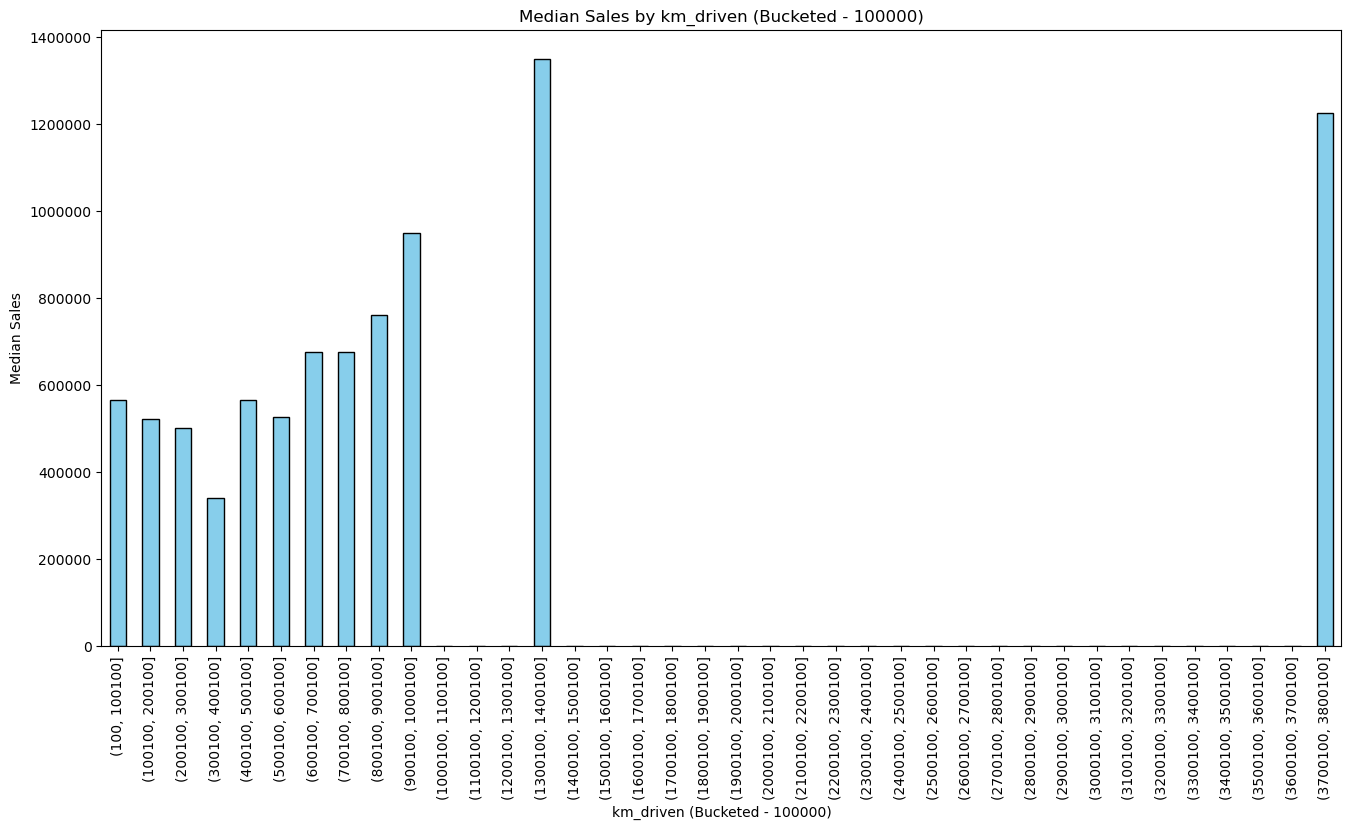

In [32]:
plot_binned_sales("km_driven", 100000)

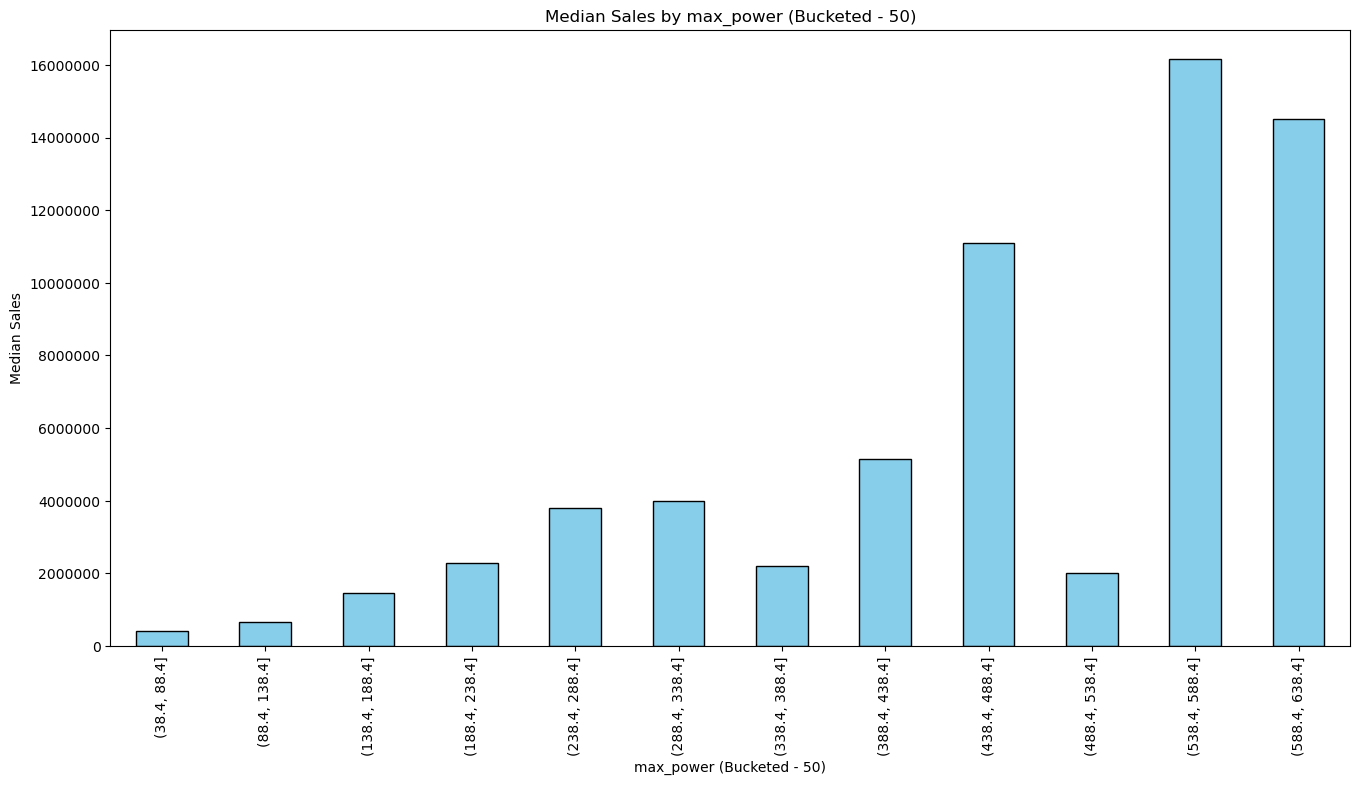

In [33]:
plot_binned_sales("max_power", 50)

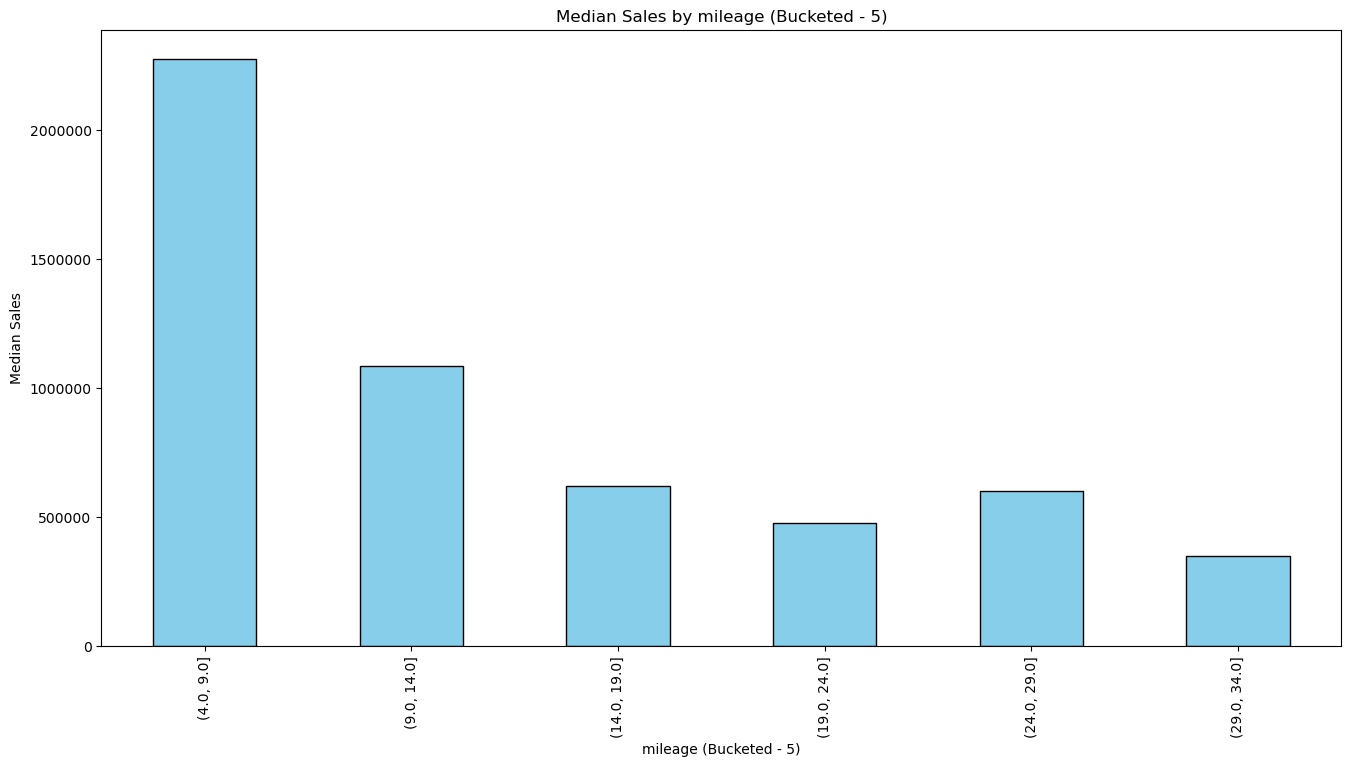

In [34]:
plot_binned_sales("mileage", 5)      

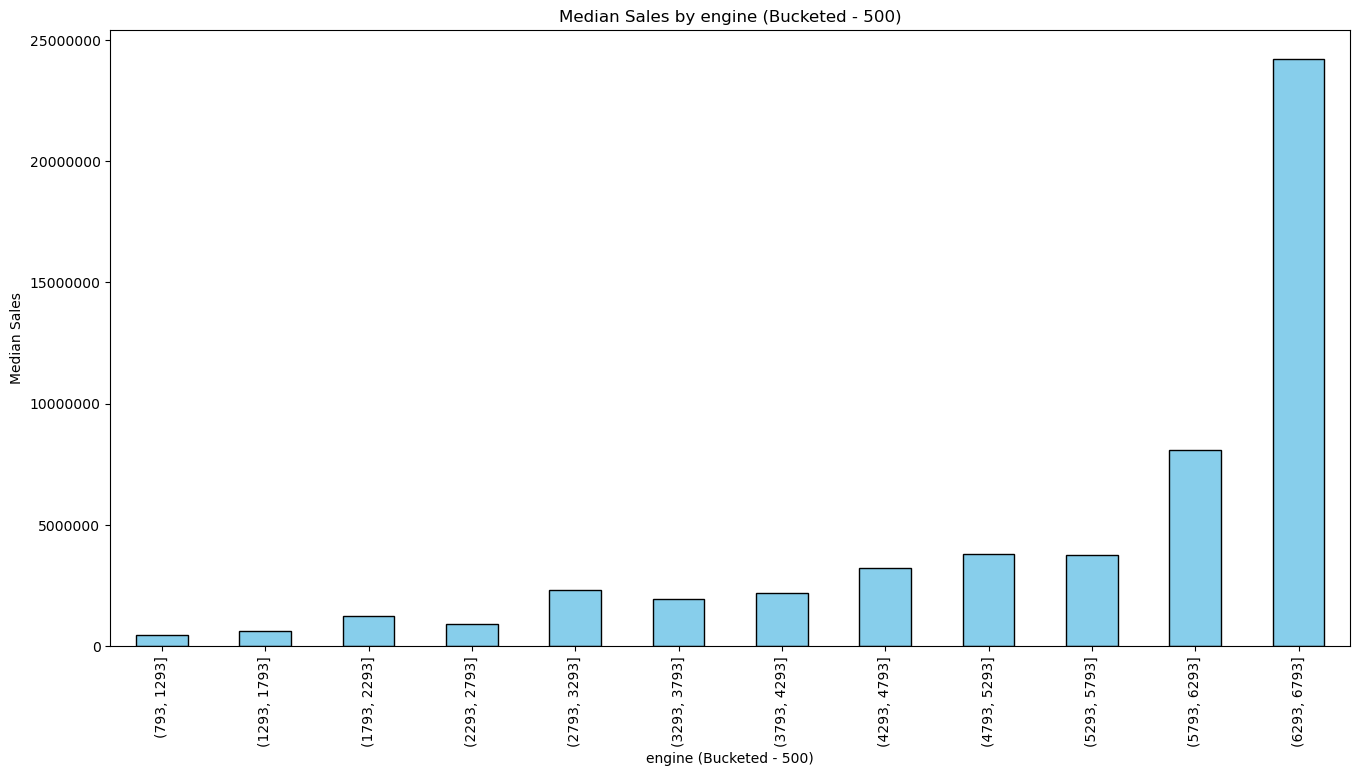

In [35]:
plot_binned_sales("engine", 500)   

In [36]:
cars_df.drop(columns=["km_driven_bucketed","max_power_bucketed","mileage_bucketed","engine_bucketed"],inplace =True)

**lets check why the cars with > 13 lakh km driven cost lot than others? when it should be priced lower**

In [37]:
cars_df[(cars_df["km_driven"]>= 3000000) | (cars_df["km_driven"]>= 1300000)]

,car_name,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
11903,Mercedes-Benz E-Class,Mercedes-Benz,9,1325000,Dealer,Diesel,Automatic,11.5,2987,210.0,5,1350000
15409,Mahindra XUV500,Mahindra,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


**we could infer that it must be because of any speciality it have (outlier) or  error in selling price so we dont want to consider this as it is only one car**

### INSIGHTS OF MEDIAN SELLING PRICE OF CARS:

* **By Brand:**
    * The Median selling price of **Maruti** is less than **5 lakhs INR** though it has highest sales in terms of both count and amount.

    * **Ferrai and Rolls-Royce** cars have the highest median selling price of more than **35 lakhs and 20 lakhs INR** respectively.
---  
* **Based on Car Model(only top 50 selling cars in counts):**
    * **BMW-5 series** has highest median selling price of more than **25 lakhs INR** in the top 50 selling cars
---  
* **Based on transmission ,seats and fuel type**:
    * The median selling price of cars based on transmission ,seats and fuel type is contradictory to total sales because the median selling price tends to be on the higher side when there are fewer values or lower frequency.
---
* **Based on vehicle age**:
  *  The median selling price of cars **increases** until the car is **3 years old**, and then it starts to **decline** except for the case with **25 years old** may be an **outlier** .
--- 
* **By Km_driven**:
    * The median selling price of cars **decreases** from **100 km to 4 lakh km**, and then there is a steady **increase** in the selling price from **4 lakh km to 10 lakh km**.   



### **Statistical Summary and Multivatiate Analysis:**

In [38]:
cars_df.describe(include= "O").T

,count,unique,top,freq
car_name,15244,121,Hyundai i20,898
brand,15244,32,Maruti,4933
seller_type,15244,3,Dealer,9459
fuel_type,15244,5,Petrol,7555
transmission_type,15244,2,Manual,12094


In [39]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_age,15244.0,6.041131,3.016228,0.0,4.0,6.00,8.0,29.00
km_driven,15244.0,55639.582327,51766.299327,100.0,30000.0,50000.00,70000.0,3800000.00
mileage,15244.0,19.697333,4.169307,4.0,17.0,19.67,22.7,33.54
engine,15244.0,1486.171543,520.419390,793.0,1197.0,1248.00,1582.0,6592.00
max_power,15244.0,100.607652,42.915687,38.4,74.0,88.50,117.3,626.00
seats,15244.0,5.326161,0.808760,0.0,5.0,5.00,5.0,9.00
selling_price,15244.0,774701.448111,894676.081921,40000.0,385000.0,559000.00,825000.0,39500000.00


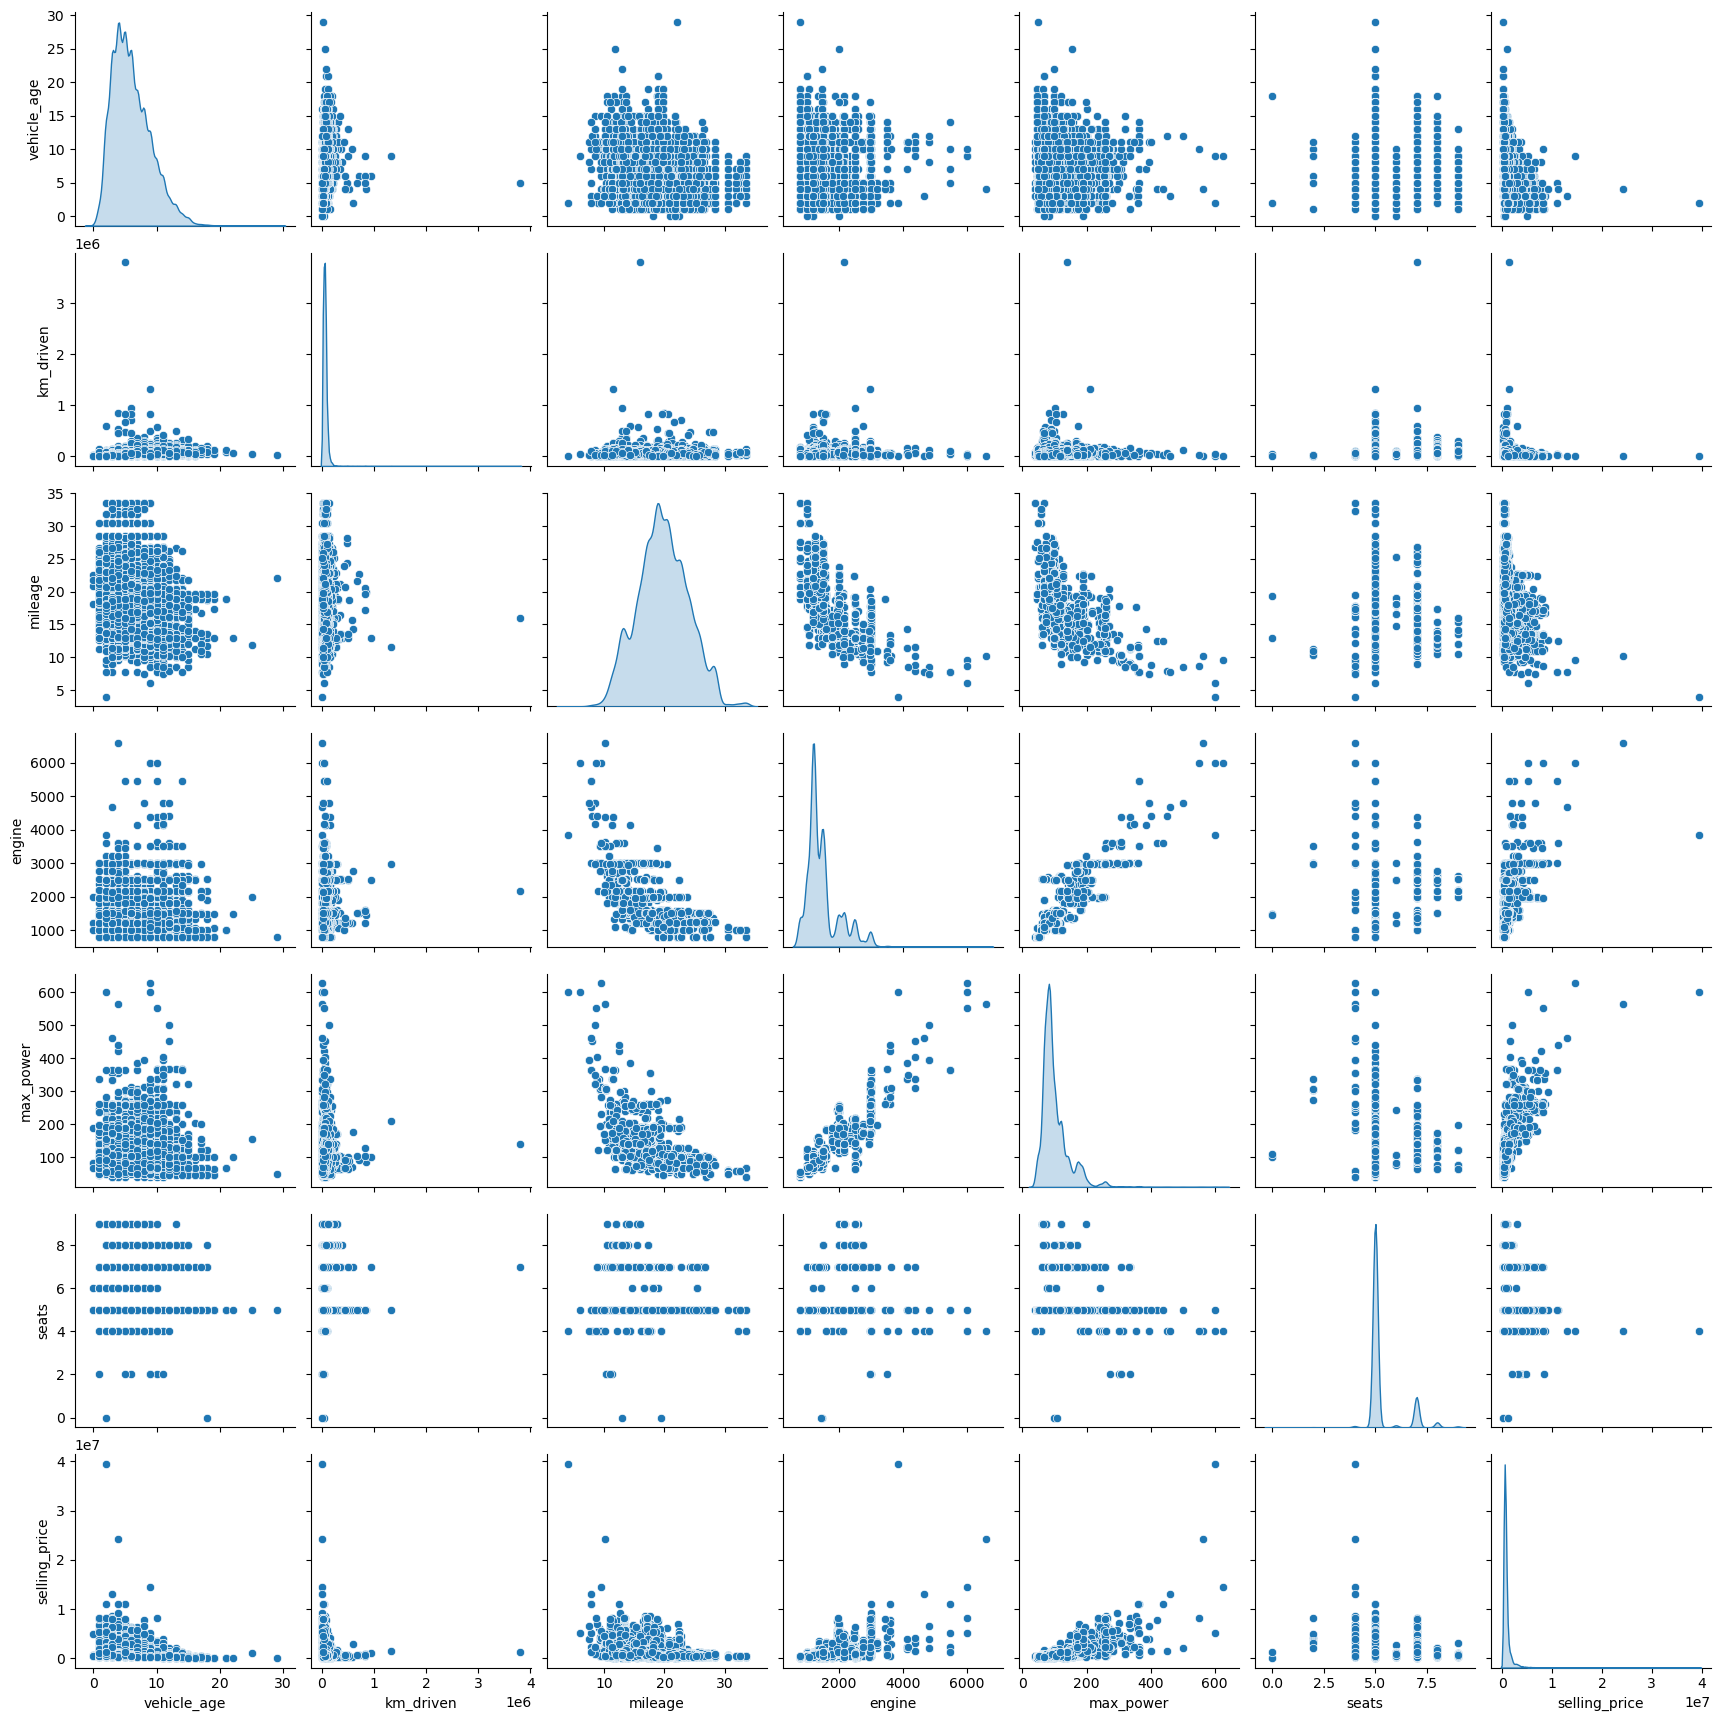

In [40]:
sns.pairplot(data = cars_df,diag_kind ="kde")

<Axes: >

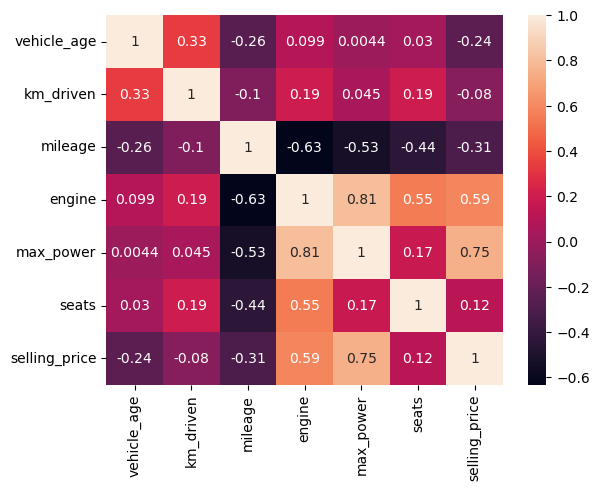

In [41]:
sns.heatmap(data =cars_df.corr(numeric_only= True),annot =True)

**There is a strong positive correlation (>0.8) between max power and engine, and 0.75 between max power and selling price, so we are dropping the max power feature.**

In [42]:
cars_df.drop(columns="max_power",inplace=True)

## **Feature Engineering and Model Building:**

### **Outlier Handling:**

#### **outlier handling of Km_driven feature:**

<Axes: >

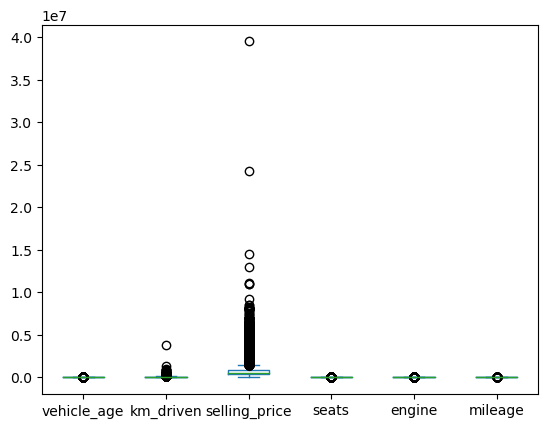

In [43]:
cars_df[["vehicle_age","km_driven","selling_price","seats","engine","mileage"]].plot(kind ="box")

In [44]:
cars_df[cars_df["km_driven"]>1300000].count()

car_name             2
brand                2
vehicle_age          2
km_driven            2
seller_type          2
fuel_type            2
transmission_type    2
mileage              2
engine               2
seats                2
selling_price        2
dtype: int64

In [45]:
cars_df = cars_df.drop(index = cars_df[cars_df["km_driven"]>1300000].index)

#### **outlier handling of selling price:**

In [46]:
cars_df[cars_df["selling_price"]>10000000].count()

car_name             7
brand                7
vehicle_age          7
km_driven            7
seller_type          7
fuel_type            7
transmission_type    7
mileage              7
engine               7
seats                7
selling_price        7
dtype: int64

In [47]:
cars_df = cars_df.drop(index=cars_df[cars_df["selling_price"] > 10000000].index)

#### **Dropping Redundant columnns**

In [48]:
cars_df.head()

,car_name,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats,selling_price
0,Maruti Alto,Maruti,9,120000,Individual,Petrol,Manual,19.70,796,5,120000
1,Hyundai Grand,Hyundai,5,20000,Individual,Petrol,Manual,18.90,1197,5,550000
2,Hyundai i20,Hyundai,11,60000,Individual,Petrol,Manual,17.00,1197,5,215000
3,Maruti Alto,Maruti,9,37000,Individual,Petrol,Manual,20.92,998,5,226000
4,Ford Ecosport,Ford,6,30000,Dealer,Diesel,Manual,22.77,1498,5,570000


In [49]:
cars_df.drop(columns="brand",inplace =True)

### **Encoding the Categorical Variables:**

#### **Segregating Target and Features**

In [50]:
y = cars_df["selling_price"]
X = cars_df.drop(columns=["selling_price"])

#### **Label Encoding for car_name varaible:**

In [51]:
X.columns

Index(['car_name', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'seats'],
      dtype='object')

In [52]:
X["car_name"].nunique()

119

**Since it has more than 10 unique values, we cannot use one-hot encoding, and it also has more than 50 unique values, so we cannot use target and frequency encoding. so, we are going to use label encoding.**

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["car_name"] = le.fit_transform(X["car_name"])

In [54]:
X.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats
0,64,9,120000,Individual,Petrol,Manual,19.70,796,5
1,33,5,20000,Individual,Petrol,Manual,18.90,1197,5
2,39,11,60000,Individual,Petrol,Manual,17.00,1197,5
3,64,9,37000,Individual,Petrol,Manual,20.92,998,5
4,19,6,30000,Dealer,Diesel,Manual,22.77,1498,5


#### **OneHot encoding for other categorical columns**

In [55]:
X = pd.get_dummies(X, drop_first=True)

In [56]:
X.head()

,car_name,vehicle_age,km_driven,mileage,engine,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,64,9,120000,19.70,796,5,1,0,0,0,0,1,1
1,33,5,20000,18.90,1197,5,1,0,0,0,0,1,1
2,39,11,60000,17.00,1197,5,1,0,0,0,0,1,1
3,64,9,37000,20.92,998,5,1,0,0,0,0,1,1
4,19,6,30000,22.77,1498,5,0,0,1,0,0,0,1


### **Spliting the data:**

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.30,random_state=3)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.50,random_state=3)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(10664, 13)
(10664,)
(2285, 13)
(2285,)
(2286, 13)
(2286,)


### **Scaling the data:**

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled =scaler.transform(X_test)

### **Linear Regression**

In [60]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

y_predict = lr_model.predict(X_val_scaled)

lr_model.score(X_val_scaled,y_val)

0.5611010742956724

In [61]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

297213.2310550502
535296.4904883348
0.5611010742956724


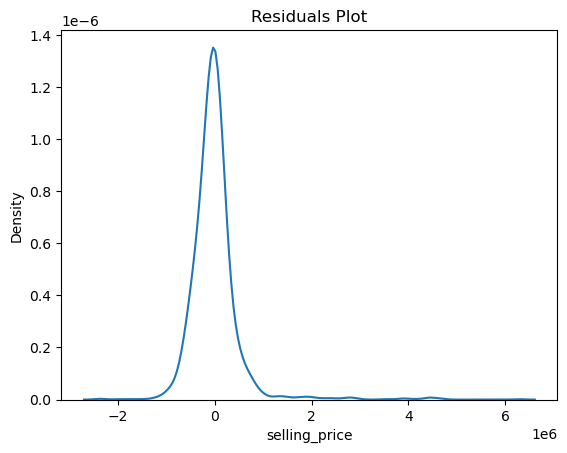

In [62]:
residual = y_val- y_predict
sns.kdeplot(residual)
plt.title("Residuals Plot")
plt.show()

### **Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=3)
dt_model.fit(X_train,y_train)

y_predict = dt_model.predict(X_val)

dt_model.score(X_val,y_val)

0.8714838868719532

In [64]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

128677.78993435449
289661.60199353774
0.8714838868719532


### **Random Forest**

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=3)
rf_model.fit(X_train,y_train)

y_predict = rf_model.predict(X_val)

rf_model.score(X_val,y_val)

0.922897941314137

In [66]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

107756.08658789545
224359.8413644153
0.922897941314137


### **AdaBoost** 

In [67]:
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(random_state=3)
adb_model.fit(X_train,y_train)

y_predict = adb_model.predict(X_val)

adb_model.score(X_val,y_val)

0.7299022259411198

In [68]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

258004.85008027658
419925.8787427225
0.7299022259411198


### **Gradient Boost**

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gdb_model = GradientBoostingRegressor(random_state=3)
gdb_model.fit(X_train,y_train)

y_predict = gdb_model.predict(X_val)

gdb_model.score(X_val,y_val)

0.9014604246906838

In [70]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

137651.27736627928
253639.84566774807
0.9014604246906838


### **XGBOOST**

In [71]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_val)
xgb_model.score(X_val,y_val)

0.9441330389837467

In [72]:
print(mean_absolute_error(y_val,y_predict))
print(np.sqrt(mean_squared_error(y_val,y_predict)))
print(r2_score(y_val,y_predict))

95974.65828432713
190980.77925317537
0.9441330389837467


## **Final Model with Tuning:**

### **Hyperparameter tuning Using RandomisedSearchCV**

##### **From the above i can see my best model is XGBoost with all features so we will be using that for Tuning**

##### **Before tuning, I am going to create a pipeline and use a column transformer to prepare a preprocessor that contains a one-hot encoder and a standard scaler. So, I am going to do a new train-test split. I am doing this to avoid inconsistency and the tedious process of saving or pickling our model later for Streamlit web app deployment because pd.get_dummies cannot be put into a pipeline.**

#### **Label Encoding:**

In [73]:
X = cars_df.drop(columns=["selling_price"])  # Non-encoded features
y = cars_df["selling_price"]


label_encoder = LabelEncoder()
X["car_name"] = label_encoder.fit_transform(X["car_name"])

### **Splitting:**

In [74]:
# we dont need to worry about inconsistent or biased split because we are going to use the same random state which we have used before so nothing changes:

X_train_h,X_temp_h,y_train_h,y_temp_h = train_test_split(X,y,test_size=0.30,random_state=3)
X_val_h,X_test_h,y_val_h,y_test_h = train_test_split(X_temp_h,y_temp_h,test_size=0.50,random_state=3)

In [75]:
categorical_features=['seller_type', 'fuel_type', 'transmission_type']
numerical_features=["vehicle_age","km_driven","mileage","engine","seats"]

#### **Pipeline:**

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(), categorical_features),
    ("scaler", StandardScaler(), numerical_features)
])

pipe = make_pipeline(preprocessor,XGBRegressor())

In [77]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                    ['seller_type', 'fuel_type',
                                     'transmission_type']),
                                   ('scaler', StandardScaler(),
                                    ['vehicle_age', 'km_driven', 'mileage',
                                     'engine', 'seats'])])),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_dep

#### **Tuning:**

In [78]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
                'xgbregressor__learning_rate': stats.uniform(0.01, 0.5),
                'xgbregressor__n_estimators': [100, 200, 300, 400, 500],
                'xgbregressor__max_depth': [3, 6, 9, 12],
                'xgbregressor__alpha': [0, 1, 5, 10],
                'xgbregressor__min_child_weight': [1, 3, 5, 7],
                'xgbregressor__subsample': [0.5, 0.7, 0.9, 1.0],
                'xgbregressor__gamma': [0, 0.1, 0.2, 0.5] }

random_search = RandomizedSearchCV(
                                    estimator=pipe, 
                                    param_distributions=param_dist, 
                                    n_iter=100, 
                                    scoring='neg_mean_squared_error', 
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1 )

X_train_combined = pd.concat([X_train_h, X_val_h], axis=0)
y_train_combined = pd.concat([y_train_h, y_val_h], axis=0)

# Fit RandomizedSearchCV
random_search.fit(X_train_combined, y_train_combined)

# Get best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'xgbregressor__alpha': 0, 'xgbregressor__gamma': 0, 'xgbregressor__learning_rate': 0.1743914239034846, 'xgbregressor__max_depth': 6, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 300, 'xgbregressor__subsample': 1.0}


In [79]:
print(f"Best Score: {np.sqrt(-1*best_score)}")

Best Score: 221106.20683472653


In [80]:
best_model = random_search.best_estimator_

In [81]:
y_predict = best_model.predict(X_test_h)
best_model.score(X_test_h, y_test_h)

0.934655278006672

### **Model Performance Comparison**

##### **Here, I will plot the results to compare the performance of the models. As before, I'll use the validation set for testing across all algorithms, except for the final hyperparameter-tuned model, which will be tested on the unseen test data.**

In [82]:
def reg_plot(model_name, y_pred, y_test, color, marker):
    fig = sns.regplot(x = y_test, y = y_pred, color=color, marker=marker)
    fig.set(title = model_name, xlabel = 'Actual Price of Used Cars in (INR)', ylabel = 'Predicted Price of the used cars in (INR)')

In [83]:
def evaluate(y_true, y_pred):
    MAE = round(mean_absolute_error(y_true, y_pred), 2)
    MSE = round(mean_squared_error(y_true, y_pred), 2)
    RMSE = round(np.sqrt(MSE), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    
    print('MAE: ', MAE)
    print('MSE: ', MSE)
    print('RMSE: ', RMSE)
    print('Rsquare Score: ', r2)

### **On validation data**

### **Linear Regression Model:**

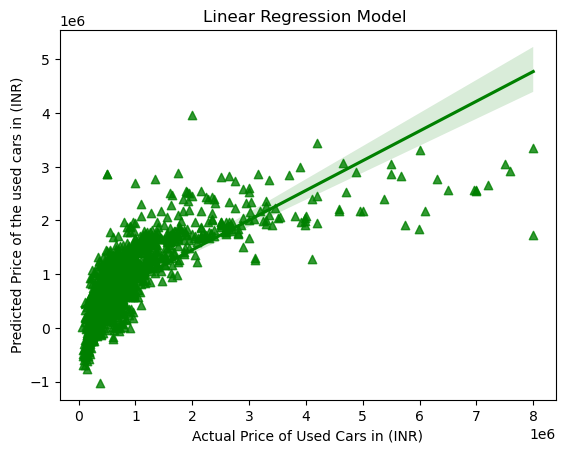

In [84]:
predictions_linear_regression = lr_model.predict(X_val_scaled)
reg_plot('Linear Regression Model ', predictions_linear_regression, y_val, 'green', '^')

In [85]:
evaluate(y_val ,predictions_linear_regression)

MAE:  297213.23
MSE:  286542332729.13
RMSE:  535296.49
Rsquare Score:  0.56


### **Decision Tree**

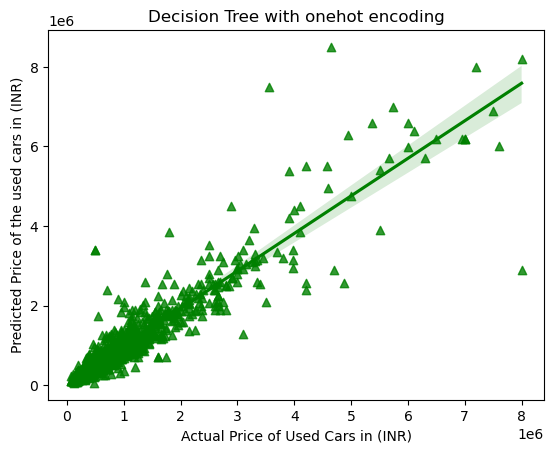

In [86]:
predictions_decision_tree = dt_model.predict(X_val)
reg_plot('Decision Tree with onehot encoding', predictions_decision_tree, y_val, 'green', '^')

In [87]:
evaluate(y_val , predictions_decision_tree)

MAE:  128677.79
MSE:  83903843669.46
RMSE:  289661.6
Rsquare Score:  0.87


### **Random Forest**

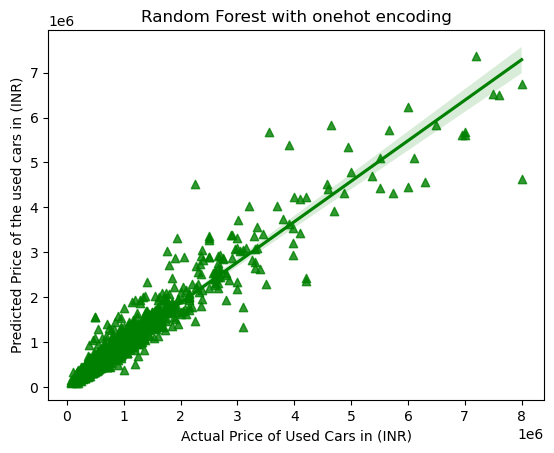

In [88]:
predictions_random_forest = rf_model.predict(X_val)
reg_plot('Random Forest with onehot encoding', predictions_random_forest, y_val, 'green', '^')

In [89]:
evaluate(y_val, predictions_random_forest)

MAE:  107756.09
MSE:  50337338417.07
RMSE:  224359.84
Rsquare Score:  0.92


### **Adaboost**

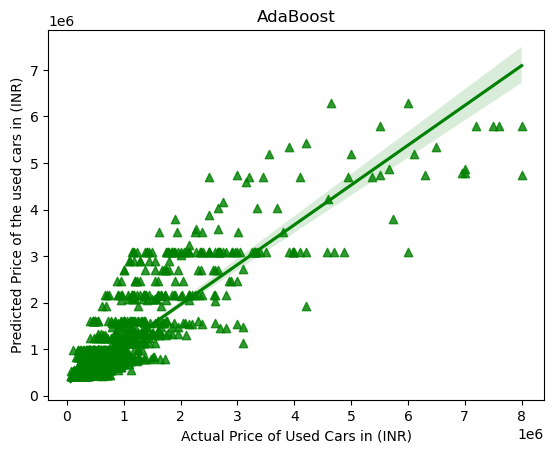

In [90]:
predictions_adaboost = adb_model.predict(X_val)
reg_plot('AdaBoost', predictions_adaboost, y_val, 'green', '^')

In [91]:
evaluate(y_val ,predictions_adaboost)

MAE:  258004.85
MSE:  176337743637.85
RMSE:  419925.88
Rsquare Score:  0.73


### **Gradient Boost**

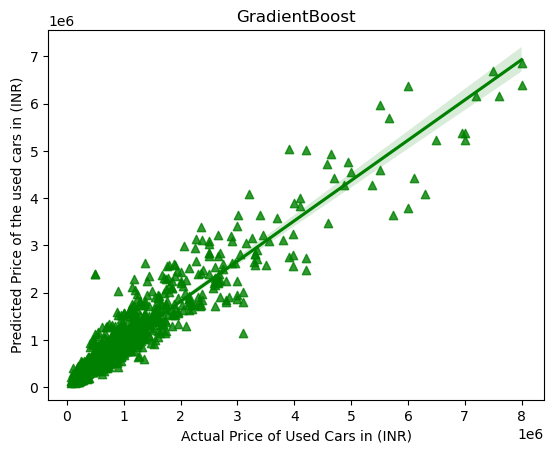

In [92]:
predictions_gradientboost = gdb_model.predict(X_val)
reg_plot('GradientBoost', predictions_gradientboost, y_val, 'green', '^')

In [93]:
evaluate(y_val ,predictions_gradientboost)

MAE:  137651.28
MSE:  64333171310.36
RMSE:  253639.85
Rsquare Score:  0.9


### **XGBoost**

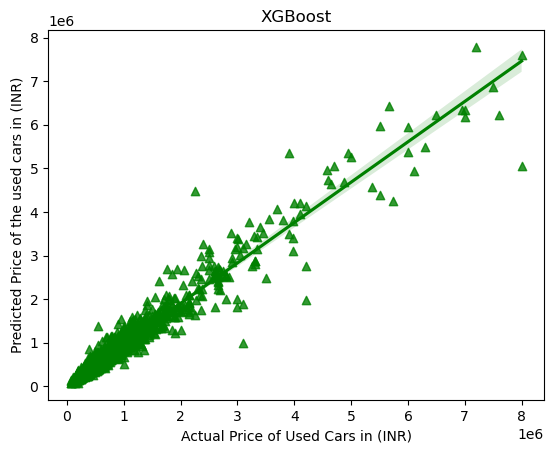

In [94]:
predictions_xgboost = xgb_model.predict(X_val)
reg_plot('XGBoost', predictions_xgboost, y_val, 'green', '^')

In [95]:
evaluate(y_val ,predictions_xgboost)

MAE:  95974.66
MSE:  36473658044.15
RMSE:  190980.78
Rsquare Score:  0.94


### **On Test data**

### **Hyperparameter Tuned XGBoost**

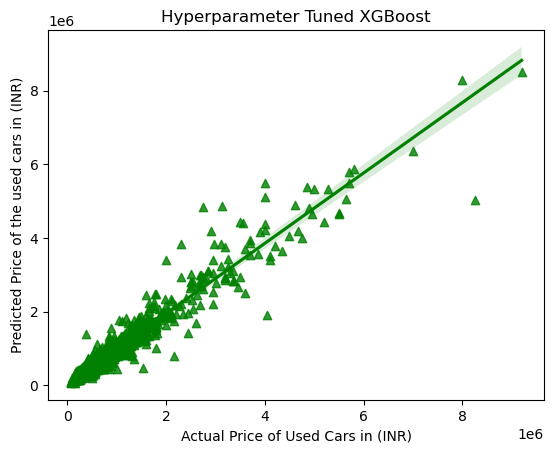

In [96]:
predictions_xgboost = best_model.predict(X_test_h)
reg_plot('Hyperparameter Tuned XGBoost', predictions_xgboost, y_test_h, 'green', '^')

In [97]:
evaluate(y_test_h , predictions_xgboost )

MAE:  96040.52
MSE:  36366088832.21
RMSE:  190698.95
Rsquare Score:  0.93


**We could say that XGBoost, even without tuning, performed at 94%, while the tuned XGBoost had a performance of 93%, showing a slight drop. However, this was tested on validation data. Also, we initially used pd.get_dummies for one-hot encoding, but in our tuned model, we integrated OneHotEncoder into our pipeline. This made it easier to save the model for the Streamlit app. If we had just used pd.get_dummies, it would have been a tedious process to work with in Streamlit.**

### **XGBoost without tuning**

**You can see how XGBoost without tuning performs on the same encoded data we have used for the tuned XGBoost.**

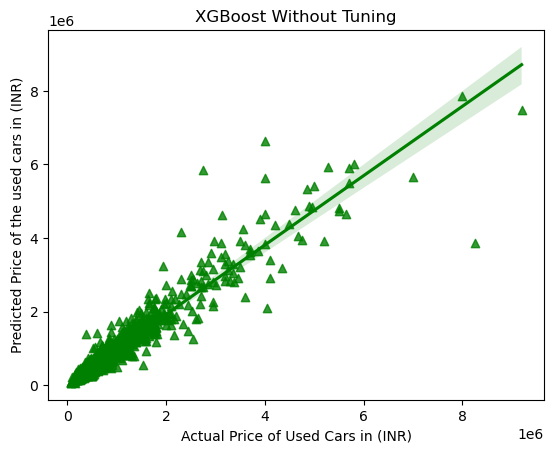

In [98]:
pipe.fit(X_train_h,y_train_h)
predictions_xgboost = pipe.predict(X_test_h)
reg_plot('XGBoost Without Tuning', predictions_xgboost, y_test_h, 'green', '^')

In [99]:
evaluate(y_test_h , predictions_xgboost )

MAE:  103297.0
MSE:  49772005685.64
RMSE:  223096.4
Rsquare Score:  0.91


#### **As you can see XGBoost without hyperparameter tuning achieves 91% accuracy, while the hyperparameter tuned XGBoost model improves the performance to 93% accuracy.**

## **Conclusion ,Insights and Deployment with streamlit**

#### So our best model is **Hyperparameter-tuned XGBOOST** with an R-square score of **93%** approximately, which is far better considering that the Linear Regression has the least performance of **56%** approximately.

### **Cross-Checking Model Predictions with Original Data (Streamlit Deployment Validation):**

#### **encoded data for testing it in the notebook:**

In [100]:
test_index = 10  
test_record_encoded = X_test_h.iloc[test_index]
print(test_record_encoded)

car_name                 78
vehicle_age               9
km_driven             58000
seller_type          Dealer
fuel_type            Petrol
transmission_type    Manual
mileage                18.9
engine                  998
seats                     5
Name: 6064, dtype: object


#### **original data of the above encoded one so we can pass these values in streamlit app after deployment:**

In [101]:
original_index = X_test.index[test_index]
test_record_original = cars_df.loc[original_index]
print(test_record_original)

car_name             Maruti Wagon R
vehicle_age                       9
km_driven                     58000
seller_type                  Dealer
fuel_type                    Petrol
transmission_type            Manual
mileage                        18.9
engine                          998
seats                             5
selling_price                310000
Name: 6064, dtype: object


#### **selling price prediction for the above car:**

In [102]:
test_record_encoded.to_frame().T 

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,seats
6064,78,9,58000,Dealer,Petrol,Manual,18.9,998,5


In [103]:
sample_df = test_record_encoded.to_frame().T 
best_model.predict(sample_df)

array([273422.72], dtype=float32)

### **INSIGHTS From Univariate Analysis:**

* No of cars based on **Fuel Type** are: 
    * Top two are **Petrol** (7555 cars) 49.5%  and **Diesel** (7342 cars) 48.16%.  
    * Combined they account for more than **97%** of the cars by fuel type.
---
* No of cars based on **Transmission Type** are:
    * **Manual** (12094 cars) 79.33%  and **Automatic** (3150 cars) 20.66%.
---
* No of cars based on **Seats** are:
    * Top three are **Five seater** (12767 cars) 83.75%  ,**7 seater owner** (1902 cars) 12.47% and **8 seater** (310 cars) 2.03%.  
    * Combined they account for more than **98%** of the cars by seats.
--- 
* No of cars based on **Seller Type** are:
    * **Individual** (5612 cars) 36.81%  ,**Trustmark Dealer** (173 cars) 1.13% , **Dealer** (9459 cars) 62.05%%.
---   
* No of cars based on **Vehicle Age** are:
    * The top five vehicle ages are **4 years** (2220 cars, 14.56%), **5 years** (2094 cars, 13.73%), **6 years** (1904 cars, 12.49%), **3 years** (1896 cars, 12.43%), and **7 years** (1427 cars 9.36%) 
    * Combined they account for more than **60%** of the cars sold by owners based on the year the cars were bought.
--- 
* **Top 5 selling cars based on the Model** are:
    * **Hyundai i20**        - (898 cars) 5.89%
    * **Maruti Swift Dzire** - (875 cars) 5.74%
    * **Maruti Swift**       - (774 cars) 5.07%
    * **Maruti Alto**        - (768 cars) 5.03%
    * **Honda City**         - (750 cars) 4.92%
  
  **These 5 cars accounts for more than **25%** of total cars sold.**
--- 
* **Top 5 selling cars based on the Brand** are:
    * **Maruti**   - (1072 cars) 32.36%
    * **Hyundai**  - (637 cars)  19.36%
    * **Honda**    - (220 cars)  9.68%
    * **Mahindra** - (328 cars)  6.55%
    * **Toyota**   - (308 cars)  5.17% 

  **These top 5 brands account for more than 70% of the cars sold.**

### **Insights From Bivariate Analysis By Total Sales:**

* **Total** sales of all cars amount to **1180.95 crores INR**.
 
* Out of which  **Maruti** Brand cars alone sold for more than **200 crores INR** and Maruti **swift Dzire** alone sold for more than **40 crores INR** but **Toyota Innova** tops the sales with more than **60 crores INR**.

* we can clearly see when the **km driven** by the cars **increases** the **sales** of the cars **decreases**.

* **Diesel** Based cars sold for more than **700 crores INR**.
.
* **Manual** Transmission cars are sold for more than **600 crores INR**.

* **5 seater** cars are sold for more than **800 crores INR**.

* Total sales of the cars with engine power between **700 and 2300** alone accounts for more than **850 crores INR**.



### INSIGHTS OF MEDIAN SELLING PRICE OF CARS:

* **By Brand:**
    * The Median selling price of **Maruti** is less than **5 lakhs INR** though it has highest sales in terms of both count and amount.

    * **Ferrai and Rolls-Royce** cars have the highest median selling price of more than **35 lakhs and 20 lakhs INR** respectively.
---  
* **Based on Car Model(only top 50 selling cars in counts):**
    * **BMW-5 series** has highest median selling price of more than **25 lakhs INR** in the top 50 selling cars
---  
* **Based on transmission ,seats and fuel type**:
    * The median selling price of cars based on transmission ,seats and fuel type is contradictory to total sales because the median selling price tends to be on the higher side when there are fewer values or lower frequency.
---
* **Based on vehicle age**:
  *  The median selling price of cars **increases** until the car is **3 years old**, and then it starts to **decline** except for the case with **25 years old** may be an **outlier** .
--- 
* **By Km_driven**:
    * The median selling price of cars **decreases** from **100 km to 4 lakh km**, and then there is a steady **increase** in the selling price from **4 lakh km to 10 lakh km**.   






## * **🔗 Visit the [Streamlit app](https://used-car-price-prediction-with-machine-learning-and.streamlit.app/) to interact with the model in real-time!**

## * **💻 Find the full project repository on [GitHub](https://github.com/arunkumarsp-ds/Used-Car-Price-Prediction-with-Machine-Learning-and-Streamlit)!**

## **Saving the model , label encoder and data to use in the demo app (Please Refer Github for streamlit deployment):**

In [107]:
import joblib
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [108]:
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [109]:
cars_df.to_csv('updated_cars_data.csv', index=False)